#### Team Name: sso9282_sk11297_zy2891
#### Team Members: Simar Oberoi (sso9282), Soohan Kim (sk11297), Zehao Yang (zy2891) 

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1:
Augment the main dataset from the previous homework by labeling each company -month into the correct fiscal calendar quarters. 

Map using tickers and exchange to the main data then augment the main data with period start and end dates for fiscal quarters (not years). Private companies will not be mapped.

Our data is monthly, but some fiscal quarters do not start on the first of a month / end on the end date of the final month. For start dates, map the date up or down to the closest month. Do the same with end dates. When mapping, the first month of the fiscal quarter is inclusive into that quarter, however the end date is only inclusive month prior to the end date.

For example, **NASDAQ:JACK 2020-Q3** starts on April 13 and ends on July 5. So the months of April, May, and June are mapped to 2020-Q3.

**Show your work.**


In [149]:
# Load dataset
data_path = '../data/facteus_10k_user_panel.zip'

import zipfile
import pandas as pd

zipped = zipfile.ZipFile(data_path, 'r')
df = pd.read_csv(zipped.open('facteus_10k_user_panel.csv'))
df.head(10)

KeyboardInterrupt: 

In [ ]:
print(type(df['date']))
df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
print(type(df['date']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
df

account       date  \
0        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
1        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
2        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
3        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
4        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-02-01   
...                                           ...        ...   
4242940  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242941  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242942  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242943  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242944  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   

                  merchant                        merchant_string_example  \
0                   AMAZON  AMAZON MKTPLACE PMTS   AMZN.COM/BILLWAUSPUGLV   
1            DUNKIN DONUTS  DUNKIN #308696 Q35     IRVINGTON    NJUS0EBSE   
2              EXXON MOBIL  EXXONMOBIL    99243909 NEWARK       NJUS1JJWD   
3                 PNC BANK                 PNC BANK              MAPYJCUN   
4                   AMAZON  AMAZON MKTPLACE PMTS   AMZN.COM/BILLWAUSOA5ML   
...                    ...                                            ...   
4242940           7-ELEVEN                 7ELEVEN-FCTI          CHAZOZXT   
4242941       AMC THEATRES  AMC CAROLINA PAV #0681 CHARLOTTE    NCUSR1YLQ   
4242942              ARBYS  ARBYS #5989 CHARLOTTE  CHARLOTTE    NCUSRAMID   
4242943  BATH & BODY WORKS  BATH AND BODY WORKS 328PINEVILLE    NCUS5CCGT   
4242944             BP GAS  BP#8169278BALLNTYNE COMCHARLOTTE    NCUSZDLQJ   

        merchant_ticker      merchant_exchange  transactions   spend  \
0                  AMZN                 NASDAQ             2    4.72   
1                  DNKN                 NASDAQ             1    7.33   
2                   XOM                   NYSE             1   10.02   
3                   PNC                   NYSE             3  212.44   
4                  AMZN                 NASDAQ             3   44.04   
...                 ...                    ...           ...     ...   
4242940            3382   Tokyo Stock Exchange             8  206.00   
4242941             AMC                   NYSE             1   13.70   
4242942             NaN                    NaN             1    5.20   
4242943              LB                   NYSE             1   67.57   
4242944              BP  London Stock Exchange             1   30.60   

         spend_min  spend_max  
0             1.88       2.84  
1             7.33       7.33  
2            10.02      10.02  
3            29.74     102.36  
4            10.17      20.94  
...            ...        ...  
4242940       2.13      60.89  
4242941      13.70      13.70  
4242942       5.20       5.20  
4242943      67.57      67.57  
4242944      30.60      30.60  

[4242945 rows x 10 columns]

In [ ]:
print(df['merchant_exchange'].value_counts())

NYSE                         1593621
NASDAQ                       1098752
London Stock Exchange         158086
Toronto Stock Exchange        147309
Tokyo Stock Exchange          112468
Euronext Amsterdam             19638
Mexican Stock Exchange          8716
Other                           5546
Stockholm Stock Exchange        4914
OTC                             3287
Tel Aviv Stock Exchange         2452
Swiss Exchange                  1705
American Stock Exchange         1369
Madrid Stock Exchange           1308
Australian Stock Exchange        515
Frankfurt Stock Exchange         484
Irish Stock Exchange             397
Hong Kong Stock Exchange         298
Philippine Stock Exchange        277
Euronext Paris                   156
Euronext Brussels                 88
Korean Stock Exchange             78
Shenzhen Stock Exchange           67
Borsa Italiana                    47
Oslo Stock Exchange               40
Name: merchant_exchange, dtype: int64


In [ ]:
exchange_mapping = {
    "NYSE": ["NYSE"],
    "NASDAQ": ["NASDAQ"],
    "London Stock Exchange": ['LON'],
    "Toronto Stock Exchange": ['TSX'],
    "Tokyo Stock Exchange": ['T', 'TYO', 'TSE'],
    "Euronext Amsterdam": ['AMS'], 
    "Mexican Stock Exchange": ["BMV"],
    "Other": ['OTHER'],
    "Stockholm Stock Exchange": ['STO'],
    "OTC": ['OTCMKTS', 'OTCPK'],
    "Tel Aviv Stock Exchange": ['TASE'],
    "Swiss Exchange": ['SWX', 'SIX'],
    "American Stock Exchange": ['NYSE', 'AMEX'],
    "Madrid Stock Exchange": ['BME'],
    "Australian Stock Exchange": ['ASX'],
    "Frankfurt Stock Exchange": ['ETR'],
    "Irish Stock Exchange": ['ISE'],
    "Hong Kong Stock Exchange": ['HKSE'],
    "Philippine Stock Exchange":['PSE'],
    "Euronext Paris": ['EPA'],
    "Euronext Brussels":['BRU'], 
    "Korean Stock Exchange": ['KRX'],
    "Shenzhen Stock Exchange": ['SZSE'],
    "Borsa Italiana": ['BIT'],
    "Oslo Stock Exchange": ['OSE']
}


In [ ]:
fiscal_calendar = pd.read_csv('../data/fiscal_calander.csv').dropna()

In [ ]:
fiscal_calendar.head(10)

PERIOD_NAME     PERIOD_TYPE PERIOD_START_DATE PERIOD_END_DATE company_id1  \
0     Q1-2014  fiscal_quarter        2014-01-01      2014-03-31   005930 KS   
1     Q1-2014  fiscal_quarter        2014-01-01      2014-03-31   005930 KS   
2     Q1-2014  fiscal_quarter        2014-01-01      2014-03-31   005930 KS   
3     Q2-2014  fiscal_quarter        2014-04-01      2014-06-30   005930 KS   
4     Q2-2014  fiscal_quarter        2014-04-01      2014-06-30   005930 KS   
5     Q2-2014  fiscal_quarter        2014-04-01      2014-06-30   005930 KS   
6     Q3-2014  fiscal_quarter        2014-07-01      2014-09-30   005930 KS   
7     Q3-2014  fiscal_quarter        2014-07-01      2014-09-30   005930 KS   
8     Q3-2014  fiscal_quarter        2014-07-01      2014-09-30   005930 KS   
9     Q4-2014  fiscal_quarter        2014-10-01      2014-12-31   005930 KS   

  company_id2 PERIOD_NAME_STANDARDIZED  
0  KRX:005930                  2014-1Q  
1  KRX:005930                  2014-1Q  
2  KRX:005930                  2014-1Q  
3  KRX:005930                  2014-2Q  
4  KRX:005930                  2014-2Q  
5  KRX:005930                  2014-2Q  
6  KRX:005930                  2014-3Q  
7  KRX:005930                  2014-3Q  
8  KRX:005930                  2014-3Q  
9  KRX:005930                  2014-4Q

In [ ]:
fiscal_calendar['PERIOD_TYPE'].value_counts()

fiscal_quarter      37601
fiscal_year         16536
fiscal_half_year      342
Name: PERIOD_TYPE, dtype: int64

In [ ]:
fiscal_calendar = fiscal_calendar[fiscal_calendar['PERIOD_TYPE']=='fiscal_quarter'].drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
d1 = pd.to_datetime('2014-10-05')
print(d1+pd.tseries.offsets.MonthBegin(1))
print(d1+pd.tseries.offsets.MonthEnd(1))
print(pd.Timestamp(d1.year, d1.month, 1))

2014-11-01 00:00:00
2014-10-31 00:00:00
2014-10-01 00:00:00


In [ ]:
def adjust_start_date(date):
    if date.day <= 15:
        return date + pd.tseries.offsets.MonthBegin(-1)
    else:
        return date + pd.tseries.offsets.MonthBegin(1)

def adjust_end_date(date):
    if date.day <= 15:
        return date + pd.tseries.offsets.MonthEnd(-1)
    else:
        return date + pd.tseries.offsets.MonthEnd(1)

In [ ]:
fiscal_calendar['PERIOD_START_DATE'] = pd.to_datetime(fiscal_calendar['PERIOD_START_DATE'])
fiscal_calendar['PERIOD_END_DATE'] = pd.to_datetime(fiscal_calendar['PERIOD_END_DATE'])

In [ ]:
fiscal_calendar['ADJUSTED_PERIOD_START_DATE'] = fiscal_calendar['PERIOD_START_DATE'].apply(adjust_start_date)
fiscal_calendar['ADJUSTED_PERIOD_END_DATE'] = fiscal_calendar['PERIOD_END_DATE'].apply(adjust_end_date)

In [ ]:
fiscal_calendar

PERIOD_NAME     PERIOD_TYPE PERIOD_START_DATE PERIOD_END_DATE  \
0         Q1-2014  fiscal_quarter        2014-01-01      2014-03-31   
3         Q2-2014  fiscal_quarter        2014-04-01      2014-06-30   
6         Q3-2014  fiscal_quarter        2014-07-01      2014-09-30   
9         Q4-2014  fiscal_quarter        2014-10-01      2014-12-31   
12        Q1-2015  fiscal_quarter        2015-01-01      2015-03-31   
...           ...             ...               ...             ...   
54391     Q4-2021  fiscal_quarter        2021-10-01      2021-12-31   
54395     Q1-2022  fiscal_quarter        2022-01-01      2022-03-31   
54399     Q2-2022  fiscal_quarter        2022-04-01      2022-06-30   
54403     Q3-2022  fiscal_quarter        2022-07-01      2022-09-30   
54407     Q4-2022  fiscal_quarter        2022-10-01      2022-12-31   

      company_id1  company_id2 PERIOD_NAME_STANDARDIZED  \
0       005930 KS   KRX:005930                  2014-1Q   
3       005930 KS   KRX:005930                  2014-2Q   
6       005930 KS   KRX:005930                  2014-3Q   
9       005930 KS   KRX:005930                  2014-4Q   
12      005930 KS   KRX:005930                  2015-1Q   
...           ...          ...                      ...   
54391     ZNGA US  NASDAQ:ZNGA                  2021-4Q   
54395     ZNGA US  NASDAQ:ZNGA                  2022-1Q   
54399     ZNGA US  NASDAQ:ZNGA                  2022-2Q   
54403     ZNGA US  NASDAQ:ZNGA                  2022-3Q   
54407     ZNGA US  NASDAQ:ZNGA                  2022-4Q   

      ADJUSTED_PERIOD_START_DATE ADJUSTED_PERIOD_END_DATE  
0                     2013-12-01               2014-04-30  
3                     2014-03-01               2014-07-31  
6                     2014-06-01               2014-10-31  
9                     2014-09-01               2015-01-31  
12                    2014-12-01               2015-04-30  
...                          ...                      ...  
54391                 2021-09-01               2022-01-31  
54395                 2021-12-01               2022-04-30  
54399                 2022-03-01               2022-07-31  
54403                 2022-06-01               2022-10-31  
54407                 2022-09-01               2023-01-31  

[14268 rows x 9 columns]

In [ ]:
fiscal_calendar['PERIOD_NAME_STANDARDIZED'].unique()

array(['2014-1Q', '2014-2Q', '2014-3Q', '2014-4Q', '2015-1Q', '2015-2Q',
       '2015-3Q', '2015-4Q', '2016-1Q', '2016-2Q', '2016-3Q', '2016-4Q',
       '2017-1Q', '2017-2Q', '2017-3Q', '2017-4Q', '2018-1Q', '2018-2Q',
       '2018-3Q', '2018-4Q', '2019-1Q', '2019-2Q', '2019-3Q', '2019-4Q',
       '2020-1Q', '2020-2Q', '2020-3Q', '2020-4Q', '2021-1Q', '2021-2Q',
       '2021-3Q', '2021-4Q', '2022-1Q', '2022-2Q', '2022-3Q', '2022-4Q',
       '2023-1Q', '2023-2Q', '2023-3Q', '2023-4Q', '2013-1Q', '2013-2Q',
       '2013-3Q', '2013-4Q', '2012-1Q', '2012-2Q', '2012-3Q', '2012-4Q',
       '2011-1Q', '2011-2Q', '2011-3Q', '2011-4Q', '2010-1Q', '2010-2Q',
       '2010-3Q', '2010-4Q', '-2019-1Q', '-2019-2Q', '-2019-4Q',
       '-2021-1Q', '-2021-2Q', '-2021-3Q', '-2021-4Q', '-2016-4Q'],
      dtype=object)

In [ ]:
fiscal_calendar['prefix'] = fiscal_calendar['company_id2'].str.split(':').str[0]
prefix_counts = fiscal_calendar['prefix'].value_counts()
print(prefix_counts)

NYSE       7451
NASDAQ     5697
TSX         320
LON         204
TSE         108
TYO          84
EPA          68
OTCMKTS      40
KRX          36
T            36
ETR          36
OTCPK        36
AD           32
BME          32
SWX          32
SIX          28
STO          28
Name: prefix, dtype: int64


After observing fisical data set, we can see the `company_id1` is not as standardized as `company_id2`. The latter column has more complete exchange and tickers' information. Therefore, we use `company_id2` information to match and help label each company's month into to the fiscal calendar. 

In [ ]:
from collections import defaultdict
# Map using tickers and exchange to the main data then augment the main data with period start and end dates for fiscal quarters (not years). 
mapping_dict = defaultdict(list)
for i, x in fiscal_calendar.iterrows():
    mapping_dict[x['company_id2']].append((x['ADJUSTED_PERIOD_START_DATE'], x['ADJUSTED_PERIOD_END_DATE'], x['PERIOD_NAME_STANDARDIZED']))
    

In [ ]:
mapping_dict

defaultdict(list,
            {'KRX:005930': [(Timestamp('2013-12-01 00:00:00'),
               Timestamp('2014-04-30 00:00:00'),
               '2014-1Q'),
              (Timestamp('2014-03-01 00:00:00'),
               Timestamp('2014-07-31 00:00:00'),
               '2014-2Q'),
              (Timestamp('2014-06-01 00:00:00'),
               Timestamp('2014-10-31 00:00:00'),
               '2014-3Q'),
              (Timestamp('2014-09-01 00:00:00'),
               Timestamp('2015-01-31 00:00:00'),
               '2014-4Q'),
              (Timestamp('2014-12-01 00:00:00'),
               Timestamp('2015-04-30 00:00:00'),
               '2015-1Q'),
              (Timestamp('2015-03-01 00:00:00'),
               Timestamp('2015-07-31 00:00:00'),
               '2015-2Q'),
              (Timestamp('2015-06-01 00:00:00'),
               Timestamp('2015-10-31 00:00:00'),
               '2015-3Q'),
              (Timestamp('2015-09-01 00:00:00'),
               Timestamp('2016-01-31 00:00:0

In [ ]:
for key in mapping_dict:
    seen = set()
    mapping_dict[key] = [x for x in mapping_dict[key] if not (x in seen or seen.add(x))]
    

In [ ]:
mapping_dict

defaultdict(list,
            {'KRX:005930': [(Timestamp('2013-12-01 00:00:00'),
               Timestamp('2014-04-30 00:00:00'),
               '2014-1Q'),
              (Timestamp('2014-03-01 00:00:00'),
               Timestamp('2014-07-31 00:00:00'),
               '2014-2Q'),
              (Timestamp('2014-06-01 00:00:00'),
               Timestamp('2014-10-31 00:00:00'),
               '2014-3Q'),
              (Timestamp('2014-09-01 00:00:00'),
               Timestamp('2015-01-31 00:00:00'),
               '2014-4Q'),
              (Timestamp('2014-12-01 00:00:00'),
               Timestamp('2015-04-30 00:00:00'),
               '2015-1Q'),
              (Timestamp('2015-03-01 00:00:00'),
               Timestamp('2015-07-31 00:00:00'),
               '2015-2Q'),
              (Timestamp('2015-06-01 00:00:00'),
               Timestamp('2015-10-31 00:00:00'),
               '2015-3Q'),
              (Timestamp('2015-09-01 00:00:00'),
               Timestamp('2016-01-31 00:00:0

In [ ]:
from tqdm import tqdm

In [ ]:
# Augment the main dataset from the previous homework by labeling each company month into the correct fiscal calendar quarters. 
tqdm.pandas()
def get_quarter(row):
    merchant_exchange = row['merchant_exchange']
    merchant_ticker = row['merchant_ticker']
    date = row['date']
    if merchant_exchange in exchange_mapping:
        possible_exchanges = exchange_mapping[merchant_exchange]
        for exchange in possible_exchanges:
            company_id = f'{exchange}:{merchant_ticker}'

            if company_id in mapping_dict:
                for period in mapping_dict[company_id]:
                    start_date, end_date, period_name = period
                    if start_date <= date <= end_date:
                        return period_name
    return None

df["fiscal_quarters"] = df.progress_apply(get_quarter, axis=1)

  0%|          | 0/4242945 [00:00<?, ?it/s]

100%|██████████| 4242945/4242945 [01:25<00:00, 49882.26it/s]


In [ ]:
df

account       date  \
0        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
1        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
2        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
3        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-01-01   
4        a04:512:000ACA1D00B403C9BD4848010BBBCB63 2018-02-01   
...                                           ...        ...   
4242940  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242941  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242942  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242943  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   
4242944  a04:512:E61B330AB05882BB6F20F35565F07E64 2018-02-01   

                  merchant                        merchant_string_example  \
0                   AMAZON  AMAZON MKTPLACE PMTS   AMZN.COM/BILLWAUSPUGLV   
1            DUNKIN DONUTS  DUNKIN #308696 Q35     IRVINGTON    NJUS0EBSE   
2              EXXON MOBIL  EXXONMOBIL    99243909 NEWARK       NJUS1JJWD   
3                 PNC BANK                 PNC BANK              MAPYJCUN   
4                   AMAZON  AMAZON MKTPLACE PMTS   AMZN.COM/BILLWAUSOA5ML   
...                    ...                                            ...   
4242940           7-ELEVEN                 7ELEVEN-FCTI          CHAZOZXT   
4242941       AMC THEATRES  AMC CAROLINA PAV #0681 CHARLOTTE    NCUSR1YLQ   
4242942              ARBYS  ARBYS #5989 CHARLOTTE  CHARLOTTE    NCUSRAMID   
4242943  BATH & BODY WORKS  BATH AND BODY WORKS 328PINEVILLE    NCUS5CCGT   
4242944             BP GAS  BP#8169278BALLNTYNE COMCHARLOTTE    NCUSZDLQJ   

        merchant_ticker      merchant_exchange  transactions   spend  \
0                  AMZN                 NASDAQ             2    4.72   
1                  DNKN                 NASDAQ             1    7.33   
2                   XOM                   NYSE             1   10.02   
3                   PNC                   NYSE             3  212.44   
4                  AMZN                 NASDAQ             3   44.04   
...                 ...                    ...           ...     ...   
4242940            3382   Tokyo Stock Exchange             8  206.00   
4242941             AMC                   NYSE             1   13.70   
4242942             NaN                    NaN             1    5.20   
4242943              LB                   NYSE             1   67.57   
4242944              BP  London Stock Exchange             1   30.60   

         spend_min  spend_max fiscal_quarters  
0             1.88       2.84         2017-4Q  
1             7.33       7.33            None  
2            10.02      10.02         2017-4Q  
3            29.74     102.36         2017-4Q  
4            10.17      20.94         2018-1Q  
...            ...        ...             ...  
4242940       2.13      60.89         2018-4Q  
4242941      13.70      13.70         2018-1Q  
4242942       5.20       5.20            None  
4242943      67.57      67.57            None  
4242944      30.60      30.60            None  

[4242945 rows x 11 columns]

**NASDAQ:JACK 2020-Q3** starts on April 13 and ends on July 5. So the months of April, May, and June are mapped to 2020-Q3. We validate our labeling with this example:

In [ ]:
df[(df['merchant_ticker'] == 'JACK') & (df['date']=='2020-07-01')]

account       date         merchant  \
8863     a04:512:00A24EEBB8B74216A56B3459F8E98BCF 2020-07-01  JACK IN THE BOX   
9627     a04:512:00A893AE815F765DBC73FC245568E7AA 2020-07-01  JACK IN THE BOX   
16330    a04:512:0112ACBBFA9552E4386614FEF647DB7D 2020-07-01  JACK IN THE BOX   
20638    a04:512:017C851BE55DB05504AB687111E3F81C 2020-07-01  JACK IN THE BOX   
28138    a04:512:0209A9D5A05E4B3539253187FAC17B9F 2020-07-01  JACK IN THE BOX   
...                                           ...        ...              ...   
4203333  a04:512:E2D9F7EE184802A211DCD32F583A3277 2020-07-01  JACK IN THE BOX   
4220540  a04:512:E42C18E143B3E92D2571D6D145DF6EA7 2020-07-01  JACK IN THE BOX   
4229885  a04:512:E4CFFEAF10B2841C242DBA0A3A42517F 2020-07-01  JACK IN THE BOX   
4236627  a04:512:E58366D4682D3CDF1EDF152731A35E75 2020-07-01  JACK IN THE BOX   
4237682  a04:512:E59F26B6ACF6BB6021EFD03C732B21DC 2020-07-01  JACK IN THE BOX   

                               merchant_string_example merchant_ticker  \
8863     JACK IN THE BOX 0453   MOUNTAIN VIEWCAUSC15SE            JACK   
9627     JACK IN THE BOX 6418   SIMPSONVILLE SCUSRQAXA            JACK   
16330    JACK IN THE BOX #3962  HOUSTON      TXUSMWWCD            JACK   
20638    JACK IN THE BOX 0080   NATIONAL CITYCAUSSYQPC            JACK   
28138    JACK IN THE BOX 5325   RIALTO       CAUS15M4X            JACK   
...                                                ...             ...   
4203333  JACK IN THE BOX 7212   702-385-7022 NVUSDDIEX            JACK   
4220540  JACK IN THE BOX 0397   SANTA ANA    CAUSZAKPN            JACK   
4229885  JACK IN THE BOX 1153   PHOENIX      AZUS10Q2U            JACK   
4236627  JACK IN THE BOX 3472   SACRAMENTO   CAUSWYNMT            JACK   
4237682  JACK IN THE BOX 0186   UPLAND       CAUSXY5IF            JACK   

        merchant_exchange  transactions  spend  spend_min  spend_max  \
8863               NASDAQ             2  16.13       4.98      11.15   
9627               NASDAQ             1   8.93       8.93       8.93   
16330              NASDAQ             1  38.23      38.23      38.23   
20638              NASDAQ             1  15.91      15.91      15.91   
28138              NASDAQ             1  10.93      10.93      10.93   
...                   ...           ...    ...        ...        ...   
4203333            NASDAQ             1  16.22      16.22      16.22   
4220540            NASDAQ             1   9.04       9.04       9.04   
4229885            NASDAQ             1  20.03      20.03      20.03   
4236627            NASDAQ             1   6.48       6.48       6.48   
4237682            NASDAQ             1   5.01       5.01       5.01   

        fiscal_quarters  
8863            2020-4Q  
9627            2020-4Q  
16330           2020-4Q  
20638           2020-4Q  
28138           2020-4Q  
...                 ...  
4203333         2020-4Q  
4220540         2020-4Q  
4229885         2020-4Q  
4236627         2020-4Q  
4237682         2020-4Q  

[609 rows x 11 columns]

## Part 2:
Find total Consolidated (not revenue segments) reported revenues in the revenues_kpi.csv file.

Map to the unique company/quarter from part 1 of this homework + total spend \$ per user. Check the data; sometimes the exchanges are not standardized across files, so you may need to map the exchanges in `revenues_kpi.csv` to the ones in the core data manually.

Remove outlier users, user-months, etc.

Then Perform and show a correlation coefficient between core data total spend per quarter and the reported revenues for that quarter for the **top 15 companies by total sales** in the main data. Find the ticker/exchange for these merchants and aggregate total spend on the ticker, not the merchant. Show 15 line graphs with 2 lines on each: Total Spend and Reported Revenues. Normalize them first so they are comparable or use a two-axis plot which normalizes automatically (pyplot does).

In [ ]:
revenue = pd.read_csv("../data/revenues_kpis.csv")

In [ ]:
# Find total Consolidated (not revenue segments) reported revenues in the revenues_kpi.csv file.
revenue

COMPANY_ID MERCHANT_TICKER MERCHANT_EXCHANGE MERCHANT_NAME  \
0           18711             ALL              NYSE  CONSOLIDATED   
1           18711             ALL              NYSE  CONSOLIDATED   
2           18711             ALL              NYSE  CONSOLIDATED   
3           18711             ALL              NYSE  CONSOLIDATED   
4           18711             ALL              NYSE  CONSOLIDATED   
...           ...             ...               ...           ...   
15355   648976269            DKNG            NASDAQ  CONSOLIDATED   
15356   654692030             IAC            NASDAQ  CONSOLIDATED   
15357   654692030             IAC            NASDAQ  CONSOLIDATED   
15358   654692030             IAC            NASDAQ  CONSOLIDATED   
15359   654692030             IAC            NASDAQ  CONSOLIDATED   

      FISCAL_QUARTER  KPINAME  KPIVALUE LASTCONSENSES  IS_PRIMARY_KPI  \
0            2012-1Q  Revenue  6630.000    6623.85692               1   
1            2012-2Q  Revenue  6666.000    6730.87329               1   
2            2012-3Q  Revenue  6697.000    6707.32308               1   
3            2012-4Q  Revenue  6744.000    6711.58462               1   
4            2013-1Q  Revenue  6770.000    6761.77778               1   
...              ...      ...       ...           ...             ...   
15355        2021-1Q  Revenue   312.000     229.29888               1   
15356        2020-2Q  Revenue   726.361    1186.83877               1   
15357        2020-3Q  Revenue   788.377     753.48169               1   
15358        2020-4Q  Revenue   848.819     774.67859               1   
15359        2021-1Q  Revenue   875.988     824.47631               1   

       INCLUDE_TICKER_IN_PANEL_TOTAL  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  
...                              ...  
15355                           True  
15356                           True  
15357                           True  
15358                           True  
15359                           True  

[15360 rows x 10 columns]

In [ ]:
revenue['MERCHANT_NAME'].unique()

array(['CONSOLIDATED', 'STARBUCKS', 'SAMS CLUB', 'WALMART'], dtype=object)

In [ ]:
revenue['KPINAME'].unique()

array(['Revenue', 'North America Revenue', 'US System-wide SRS USD', nan,
       'US Revenue', 'Americas Company-Operated Stores Revenues',
       'AM Company-Operated Stores Net Revenues USD',
       'US Systemwide Sales USD', "Sam's Club Net Sales",
       'Walmart US Net Sales', 'Cheesecake Factory Restaurant Sale',
       'ATM operations (M)',
       'DNKN US Systemwide & BR US Franchisee Sales UDS',
       'Core Retail OTA', 'Domestic ETSY GMS USD', 'GPV USD',
       'Gross Bookings', 'Systemwide Sales USD'], dtype=object)

In [ ]:
# Map to the unique company/quarter from part 1 of this homework + total spend \$ per user
df_grouped = df.groupby(['merchant','merchant_ticker','merchant_exchange', 'account', 'fiscal_quarters'])['spend'].sum().reset_index()

In [ ]:
df_grouped

merchant merchant_ticker merchant_exchange  \
0        1-800-FLOWERS            FLWS            NASDAQ   
1        1-800-FLOWERS            FLWS            NASDAQ   
2        1-800-FLOWERS            FLWS            NASDAQ   
3        1-800-FLOWERS            FLWS            NASDAQ   
4        1-800-FLOWERS            FLWS            NASDAQ   
...                ...             ...               ...   
1726863          ZYNGA            ZNGA            NASDAQ   
1726864          ZYNGA            ZNGA            NASDAQ   
1726865          ZYNGA            ZNGA            NASDAQ   
1726866          ZYNGA            ZNGA            NASDAQ   
1726867          ZYNGA            ZNGA            NASDAQ   

                                          account fiscal_quarters   spend  
0        a04:512:003EE0EF7B3751C11CCA94F86DE3F5BB         2019-4Q   78.18  
1        a04:512:01BB701505CB4E269C02522470E97683         2020-4Q   61.63  
2        a04:512:01BB701505CB4E269C02522470E97683         2021-2Q  170.61  
3        a04:512:0374D51524324C02EED9592914AEBDF3         2018-4Q  101.84  
4        a04:512:039FA2D0EA23ADEC8F5A13A75FE5F6DC         2020-4Q   91.49  
...                                           ...             ...     ...  
1726863                       b01:44132:972901326         2020-3Q    5.19  
1726864                       b01:44132:972901326         2020-4Q    1.06  
1726865                       b01:44132:972924162         2018-2Q  297.77  
1726866                       b01:44132:972924162         2018-3Q  404.71  
1726867                       b01:44132:972924162         2020-2Q    1.06  

[1726868 rows x 6 columns]

In [ ]:
df_grouped[(df_grouped['merchant_ticker'] == 'WMT')&(df_grouped['fiscal_quarters'].str.startswith('2020'))]

merchant merchant_ticker merchant_exchange  \
246085     BONOBOS             WMT              NYSE   
246086     BONOBOS             WMT              NYSE   
246087     BONOBOS             WMT              NYSE   
723646   HAYNEEDLE             WMT              NYSE   
723658   HAYNEEDLE             WMT              NYSE   
...            ...             ...               ...   
1650016    WALMART             WMT              NYSE   
1650024    WALMART             WMT              NYSE   
1650025    WALMART             WMT              NYSE   
1650026    WALMART             WMT              NYSE   
1650027    WALMART             WMT              NYSE   

                                          account fiscal_quarters   spend  
246085   a04:512:B6E7048BAC29A9070C8882421BD3A5C8         2020-3Q   95.94  
246086   a04:512:C936C5F871DA818A6E420ADF36CA3E1A         2020-1Q  101.35  
246087   a04:512:C936C5F871DA818A6E420ADF36CA3E1A         2020-3Q  207.84  
723646   a04:512:040D75F1D55B132FAD1BE9C004F97D9F         2020-3Q  177.63  
723658   a04:512:5BDF83E8A20F7E5CA4D5F94E1D6CD2DE         2020-2Q  119.52  
...                                           ...             ...     ...  
1650016                       b01:44132:975544339         2020-4Q  135.76  
1650024                       b01:44132:975572515         2020-1Q  251.60  
1650025                       b01:44132:975572515         2020-2Q    9.77  
1650026                       b01:44132:975572515         2020-3Q  142.67  
1650027                       b01:44132:975572515         2020-4Q  280.57  

[33787 rows x 6 columns]

In [ ]:
df_grouped.rename(columns={'merchant_ticker':'MERCHANT_TICKER', 'fiscal_quarters': 'FISCAL_QUARTER', 'merchant_exchange': 'MERCHANT_EXCHANGE'}, inplace=True)

In [ ]:
df_grouped['MERCHANT_EXCHANGE'].value_counts()

NYSE                      944403
NASDAQ                    625506
Toronto Stock Exchange     97221
Tokyo Stock Exchange       57638
Swiss Exchange              1179
Madrid Stock Exchange        776
Euronext Paris               145
Name: MERCHANT_EXCHANGE, dtype: int64

In [ ]:
revenue['MERCHANT_EXCHANGE'].value_counts()

NYSE                         8048
NASDAQ                       5430
Nasdaq                        443
Tokyo Stock Exchange          270
Toronto Stock Exchange        217
TSE                           166
BMV                            94
ENXTPA                         87
LSE                            73
ENXTBR                         72
Euronext Paris                 56
OM                             54
Euronext Amsterdam             54
Hong Kong Stock Exchange       49
ENXTAM                         47
Paris Stock Exchange           37
Stockholm Stock Exchange       36
Swiss Exchange                 36
Oslo Stock Exchange            36
XTRA                           24
Philippine Stock Exchange      11
London Stock Exchange           9
SWX                             8
Irish Stock Exchange            3
Name: MERCHANT_EXCHANGE, dtype: int64

In [ ]:
df_values = set(df_grouped['MERCHANT_EXCHANGE'].unique())
revenue_values = set(revenue['MERCHANT_EXCHANGE'].unique())

common_values = df_values.intersection(revenue_values)

unique_to_df = df_values.difference(revenue_values)

unique_to_revenue = revenue_values.difference(df_values)

print("common values:", common_values)
print("unique to df:", unique_to_df)
print("unique to revenue:", unique_to_revenue)

common values: {'Toronto Stock Exchange', 'Tokyo Stock Exchange', 'Swiss Exchange', 'NASDAQ', 'Euronext Paris', 'NYSE'}
unique to df: {'Madrid Stock Exchange'}
unique to revenue: {'ENXTPA', 'Oslo Stock Exchange', 'LSE', 'XTRA', 'ENXTBR', 'Stockholm Stock Exchange', 'Irish Stock Exchange', 'Nasdaq', 'SWX', 'BMV', 'London Stock Exchange', 'TSE', 'ENXTAM', 'OM', 'Paris Stock Exchange', 'Hong Kong Stock Exchange', 'Philippine Stock Exchange', 'Euronext Amsterdam'}


In [ ]:
r_exchange_mapping = {
    "SWX": "Swiss Exchange",
    "XTRA": "Frankfurt Stock Exchange",
    "TSE": "Tokyo Stock Exchange",
    "ENXTPA": "Euronext Paris",
    "Paris Stock Exchange": "Euronext Paris",
    "OM": "Stockholm Stock Exchange",
    "BMV": "Mexican Stock Exchange",
    "ENXTAM": "Euronext Amsterdam",
    "ENXTBR": "Euronext Brussels",
    "LSE": "London Stock Exchange",
    "Nasdaq": "NASDAQ",
}


In [ ]:
revenue['MERCHANT_EXCHANGE'] = revenue['MERCHANT_EXCHANGE'].map(r_exchange_mapping).fillna(revenue['MERCHANT_EXCHANGE'])


In [ ]:
revenue

COMPANY_ID MERCHANT_TICKER MERCHANT_EXCHANGE MERCHANT_NAME  \
0           18711             ALL              NYSE  CONSOLIDATED   
1           18711             ALL              NYSE  CONSOLIDATED   
2           18711             ALL              NYSE  CONSOLIDATED   
3           18711             ALL              NYSE  CONSOLIDATED   
4           18711             ALL              NYSE  CONSOLIDATED   
...           ...             ...               ...           ...   
15355   648976269            DKNG            NASDAQ  CONSOLIDATED   
15356   654692030             IAC            NASDAQ  CONSOLIDATED   
15357   654692030             IAC            NASDAQ  CONSOLIDATED   
15358   654692030             IAC            NASDAQ  CONSOLIDATED   
15359   654692030             IAC            NASDAQ  CONSOLIDATED   

      FISCAL_QUARTER  KPINAME  KPIVALUE LASTCONSENSES  IS_PRIMARY_KPI  \
0            2012-1Q  Revenue  6630.000    6623.85692               1   
1            2012-2Q  Revenue  6666.000    6730.87329               1   
2            2012-3Q  Revenue  6697.000    6707.32308               1   
3            2012-4Q  Revenue  6744.000    6711.58462               1   
4            2013-1Q  Revenue  6770.000    6761.77778               1   
...              ...      ...       ...           ...             ...   
15355        2021-1Q  Revenue   312.000     229.29888               1   
15356        2020-2Q  Revenue   726.361    1186.83877               1   
15357        2020-3Q  Revenue   788.377     753.48169               1   
15358        2020-4Q  Revenue   848.819     774.67859               1   
15359        2021-1Q  Revenue   875.988     824.47631               1   

       INCLUDE_TICKER_IN_PANEL_TOTAL  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  
...                              ...  
15355                           True  
15356                           True  
15357                           True  
15358                           True  
15359                           True  

[15360 rows x 10 columns]

In [ ]:
df_grouped = pd.merge(df_grouped, revenue[['MERCHANT_TICKER', 'MERCHANT_EXCHANGE', 'FISCAL_QUARTER', 'KPINAME', 'KPIVALUE']], on = ['MERCHANT_TICKER', 'MERCHANT_EXCHANGE', 'FISCAL_QUARTER'], how='left')

In [ ]:
df_grouped

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
0        1-800-FLOWERS            FLWS            NASDAQ   
1        1-800-FLOWERS            FLWS            NASDAQ   
2        1-800-FLOWERS            FLWS            NASDAQ   
3        1-800-FLOWERS            FLWS            NASDAQ   
4        1-800-FLOWERS            FLWS            NASDAQ   
...                ...             ...               ...   
1874367          ZYNGA            ZNGA            NASDAQ   
1874368          ZYNGA            ZNGA            NASDAQ   
1874369          ZYNGA            ZNGA            NASDAQ   
1874370          ZYNGA            ZNGA            NASDAQ   
1874371          ZYNGA            ZNGA            NASDAQ   

                                          account FISCAL_QUARTER   spend  \
0        a04:512:003EE0EF7B3751C11CCA94F86DE3F5BB        2019-4Q   78.18   
1        a04:512:01BB701505CB4E269C02522470E97683        2020-4Q   61.63   
2        a04:512:01BB701505CB4E269C02522470E97683        2021-2Q  170.61   
3        a04:512:0374D51524324C02EED9592914AEBDF3        2018-4Q  101.84   
4        a04:512:039FA2D0EA23ADEC8F5A13A75FE5F6DC        2020-4Q   91.49   
...                                           ...            ...     ...   
1874367                       b01:44132:972901326        2020-3Q    5.19   
1874368                       b01:44132:972901326        2020-4Q    1.06   
1874369                       b01:44132:972924162        2018-2Q  297.77   
1874370                       b01:44132:972924162        2018-3Q  404.71   
1874371                       b01:44132:972924162        2020-2Q    1.06   

         KPINAME  KPIVALUE  
0        Revenue   259.398  
1        Revenue   417.956  
2        Revenue   877.256  
3        Revenue   229.934  
4        Revenue   417.956  
...          ...       ...  
1874367  Revenue   503.332  
1874368  Revenue   616.000  
1874369  Revenue   217.000  
1874370  Revenue   233.243  
1874371  Revenue   451.688  

[1874372 rows x 8 columns]

Text(0.5, 1.0, 'Spend Data Distribution')

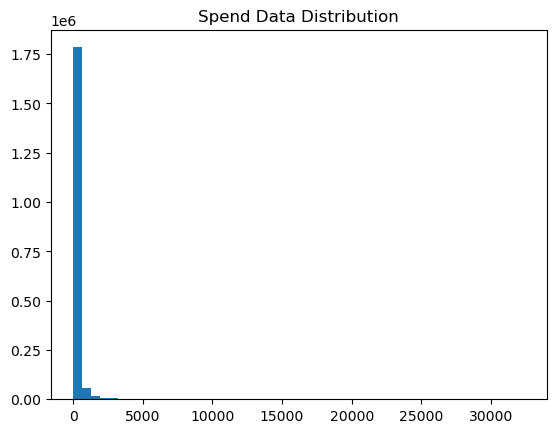

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_grouped['spend'], bins=50)
plt.title('Spend Data Distribution')

In [ ]:
# Remove outlier users
df_grouped = df_grouped[df_grouped['spend'] < np.percentile(df_grouped['spend'], 95)]

In [ ]:
#  Remove outlier at user_quarter level
df_grouped = df_grouped.groupby('FISCAL_QUARTER').apply(lambda x: x[x['spend'] < np.percentile(x['spend'], 95)])  
df_grouped

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
FISCAL_QUARTER                                                             
-2019-4Q       1552641  VITAMIN SHOPPE             FRG            NASDAQ   
               1552655  VITAMIN SHOPPE             FRG            NASDAQ   
               1552659  VITAMIN SHOPPE             FRG            NASDAQ   
               1552669  VITAMIN SHOPPE             FRG            NASDAQ   
               1552673  VITAMIN SHOPPE             FRG            NASDAQ   
...                                ...             ...               ...   
2021-4Q        1872120           ZALES             SIG              NYSE   
               1872131           ZALES             SIG              NYSE   
               1872147           ZALES             SIG              NYSE   
               1872149           ZALES             SIG              NYSE   
               1872151           ZALES             SIG              NYSE   

                                                         account  \
FISCAL_QUARTER                                                     
-2019-4Q       1552641  a04:512:0C3ED7C5973527A3F17AFC2146D76E54   
               1552655  a04:512:161676DD690B85A1A7C4CCF745D8520C   
               1552659  a04:512:19AC012751A7B6105911BC59C29A3220   
               1552669  a04:512:23A263114A7EAD7A3E6A93D99AA893AE   
               1552673  a04:512:291BACB7A85292738CE724AEF0A62A10   
...                                                          ...   
2021-4Q        1872120  a04:512:E3F232F4A6FC96E27D30972B46A91EDC   
               1872131  a04:512:F5F7D4C3E1C4B603E4E2A8398107CBEB   
               1872147                       b01:44132:934996711   
               1872149                       b01:44132:941849039   
               1872151                       b01:44132:947958388   

                       FISCAL_QUARTER   spend  KPINAME  KPIVALUE  
FISCAL_QUARTER                                                    
-2019-4Q       1552641       -2019-4Q   10.19      NaN       NaN  
               1552655       -2019-4Q   84.44      NaN       NaN  
               1552659       -2019-4Q    4.20      NaN       NaN  
               1552669       -2019-4Q   13.56      NaN       NaN  
               1552673       -2019-4Q   13.77      NaN       NaN  
...                               ...     ...      ...       ...  
2021-4Q        1872120        2021-4Q  116.83  Revenue    2186.5  
               1872131        2021-4Q   90.27  Revenue    2186.5  
               1872147        2021-4Q   27.27  Revenue    2186.5  
               1872149        2021-4Q   84.80  Revenue    2186.5  
               1872151        2021-4Q  106.18  Revenue    2186.5  

[1691605 rows x 8 columns]

In [ ]:
df_grouped.reset_index(drop=True, inplace=True)
df_grouped

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
0        VITAMIN SHOPPE             FRG            NASDAQ   
1        VITAMIN SHOPPE             FRG            NASDAQ   
2        VITAMIN SHOPPE             FRG            NASDAQ   
3        VITAMIN SHOPPE             FRG            NASDAQ   
4        VITAMIN SHOPPE             FRG            NASDAQ   
...                 ...             ...               ...   
1691600           ZALES             SIG              NYSE   
1691601           ZALES             SIG              NYSE   
1691602           ZALES             SIG              NYSE   
1691603           ZALES             SIG              NYSE   
1691604           ZALES             SIG              NYSE   

                                          account FISCAL_QUARTER   spend  \
0        a04:512:0C3ED7C5973527A3F17AFC2146D76E54       -2019-4Q   10.19   
1        a04:512:161676DD690B85A1A7C4CCF745D8520C       -2019-4Q   84.44   
2        a04:512:19AC012751A7B6105911BC59C29A3220       -2019-4Q    4.20   
3        a04:512:23A263114A7EAD7A3E6A93D99AA893AE       -2019-4Q   13.56   
4        a04:512:291BACB7A85292738CE724AEF0A62A10       -2019-4Q   13.77   
...                                           ...            ...     ...   
1691600  a04:512:E3F232F4A6FC96E27D30972B46A91EDC        2021-4Q  116.83   
1691601  a04:512:F5F7D4C3E1C4B603E4E2A8398107CBEB        2021-4Q   90.27   
1691602                       b01:44132:934996711        2021-4Q   27.27   
1691603                       b01:44132:941849039        2021-4Q   84.80   
1691604                       b01:44132:947958388        2021-4Q  106.18   

         KPINAME  KPIVALUE  
0            NaN       NaN  
1            NaN       NaN  
2            NaN       NaN  
3            NaN       NaN  
4            NaN       NaN  
...          ...       ...  
1691600  Revenue    2186.5  
1691601  Revenue    2186.5  
1691602  Revenue    2186.5  
1691603  Revenue    2186.5  
1691604  Revenue    2186.5  

[1691605 rows x 8 columns]

In [ ]:
# achieve the top 15 companies by total sales in the main data
top_firms = df_grouped.groupby(['merchant','MERCHANT_TICKER', 'MERCHANT_EXCHANGE'])['KPIVALUE'].sum()

In [ ]:
top_firms

merchant             MERCHANT_TICKER  MERCHANT_EXCHANGE    
1-800-FLOWERS        FLWS             NASDAQ                   1.120866e+05
7-ELEVEN             3382             Tokyo Stock Exchange     4.474550e+08
76 GAS               PSX              NYSE                     1.635726e+08
ABERCROMBIE & FITCH  ANF              NYSE                     2.183474e+05
ACADEMY SPORTS       KKR              NYSE                     2.801169e+05
                                                                   ...     
ZALES                SIG              NYSE                     1.927717e+05
ZARA USA             ITX              Madrid Stock Exchange    0.000000e+00
ZIPCAR               CAR              NASDAQ                   5.742880e+05
ZULILY               QRTEA            NASDAQ                   0.000000e+00
ZYNGA                ZNGA             NASDAQ                   1.915345e+05
Name: KPIVALUE, Length: 508, dtype: float64

In [ ]:
top_15 = top_firms.sort_values(ascending=False).head(15).index
top_15

MultiIndex([(    'WALMART',  'WMT',                 'NYSE'),
            (      'APPLE', 'AAPL',               'NASDAQ'),
            (     'AMAZON', 'AMZN',               'NASDAQ'),
            (        'CVS',  'CVS',                 'NYSE'),
            (  'WALGREENS',  'WBA',               'NASDAQ'),
            (  'SAMS CLUB',  'WMT',                 'NYSE'),
            (  'MCDONALDS',  'MCD',                 'NYSE'),
            (    'CHEVRON',  'CVX',                 'NYSE'),
            ('EXXON MOBIL',  'XOM',                 'NYSE'),
            (     'TARGET',  'TGT',                 'NYSE'),
            (        'ATT',    'T',                 'NYSE'),
            (     'KROGER',   'KR',                 'NYSE'),
            (  'MICROSOFT', 'MSFT',               'NASDAQ'),
            (   '7-ELEVEN', '3382', 'Tokyo Stock Exchange'),
            (   'SPEEDWAY',  'MPC',                 'NYSE')],
           names=['merchant', 'MERCHANT_TICKER', 'MERCHANT_EXCHANGE'])

In [ ]:
tickers = top_15.get_level_values('MERCHANT_TICKER').tolist()
print(tickers)

['WMT', 'AAPL', 'AMZN', 'CVS', 'WBA', 'WMT', 'MCD', 'CVX', 'XOM', 'TGT', 'T', 'KR', 'MSFT', '3382', 'MPC']


In [ ]:
df_groups_top = df_grouped[df_grouped['MERCHANT_TICKER'].isin(tickers)]
revs, spends = [], []

for quarter, df_quarter in df_groups_top.groupby('FISCAL_QUARTER'):
    rev_sum = df_quarter.groupby('MERCHANT_TICKER')['KPIVALUE'].sum()
    spend_sum = df_quarter.groupby('MERCHANT_TICKER')['spend'].sum()
    revs.append(rev_sum)
    spends.append(spend_sum)

In [ ]:
revs = pd.concat(revs, axis=1)
revs

KPIVALUE     KPIVALUE     KPIVALUE     KPIVALUE  \
MERCHANT_TICKER                                                      
AMZN             43792548.0   81083275.0  107219277.0  126641076.0   
CVS              30337395.0   82293093.0  102664184.0  111413033.0   
CVX              25202720.0   67673088.0  101155220.0  107636189.0   
KR               20514973.0   75182520.0   63169533.0   56025231.0   
MCD              23233440.0   49928247.2   69833510.7   71860995.0   
MPC              12677892.0   30165576.0   49648340.0   51329908.0   
T                25255656.0   48156108.0   62065712.0   72999444.0   
TGT              13220910.0   27917631.0   36735244.0   40134136.0   
XOM              18890260.0   59070726.0   91214741.0   98973660.0   
AAPL                    NaN  102684759.0  140737374.0  168956580.0   
MSFT                    NaN          NaN    7287336.0   17351893.0   
WBA                     NaN          NaN   76278510.0  101079296.0   
3382                    NaN          NaN          NaN          NaN   
WMT                     NaN          NaN          NaN          NaN   

                     KPIVALUE      KPIVALUE      KPIVALUE      KPIVALUE  \
MERCHANT_TICKER                                                           
AMZN             1.892037e+08  1.634818e+08  1.773400e+08  2.082014e+08   
CVS              1.310530e+08  1.589850e+08  1.531859e+08  1.525627e+08   
CVX              9.961190e+07  8.821120e+07  9.743580e+07  8.689510e+07   
KR               7.180573e+07  9.862884e+07  6.892004e+07  5.916274e+07   
MCD              7.012357e+07  6.906488e+07  7.591675e+07  7.548806e+07   
MPC              6.963774e+07  6.990644e+07  8.765618e+07  9.625817e+07   
T                7.856454e+07  7.660934e+07  7.220094e+07  6.710494e+07   
TGT              6.433672e+07  4.472136e+07  4.463554e+07  4.528316e+07   
XOM              8.426094e+07  7.514112e+07  8.912739e+07  7.968502e+07   
AAPL             2.259368e+08  3.120313e+08  2.229516e+08  2.238454e+08   
MSFT             2.629429e+07  2.745530e+07  3.506868e+07  3.408666e+07   
WBA              1.076164e+08  1.153355e+08  1.190525e+08  1.147038e+08   
3382             2.703060e+07  3.744015e+07  4.224247e+07  3.905333e+07   
WMT              5.949611e+08  8.330753e+08  1.031642e+09  9.833201e+08   

                     KPIVALUE      KPIVALUE      KPIVALUE      KPIVALUE  \
MERCHANT_TICKER                                                           
AMZN             2.777371e+08  2.501006e+08  2.993544e+08  3.242953e+08   
CVS              1.599985e+08  1.714936e+08  1.544008e+08  1.375319e+08   
CVX              8.378675e+07  6.744364e+07  3.164343e+07  5.555267e+07   
KR               6.727794e+07  9.443128e+07  5.126576e+07  5.631166e+07   
MCD              7.343461e+07  6.744927e+07  6.529016e+07  6.999407e+07   
MPC              9.914500e+07  7.137312e+07  4.621712e+07  5.069617e+07   
T                7.154249e+07  6.579410e+07  6.146595e+07  5.914898e+07   
TGT              6.449644e+07  5.279286e+07  5.217110e+07  5.291528e+07   
XOM              7.409182e+07  5.565258e+07  3.449609e+07  4.448964e+07   
AAPL             2.839534e+08  4.233774e+08  2.858503e+08  2.997381e+08   
MSFT             3.769561e+07  3.474080e+07  4.292168e+07  4.895936e+07   
WBA              1.096035e+08  1.142459e+08  1.222537e+08  1.207929e+08   
3382             3.921234e+07  3.969043e+07  4.401884e+07  3.969992e+07   
WMT              1.084561e+09  1.005922e+09  1.103792e+09  1.044206e+09   

                     KPIVALUE      KPIVALUE      KPIVALUE      KPIVALUE  \
MERCHANT_TICKER                                                           
AMZN             3.718325e+08           NaN           NaN           NaN   
CVS              1.102431e+08           NaN           NaN           NaN   
CVX              4.089852e+07           NaN           NaN           NaN   
KR               5.570570e+07           NaN           NaN           NaN   
MCD              5.769619e+07           NaN   

In [ ]:
spends = pd.concat(spends, axis=1)

In [ ]:
revs.columns = list(df_groups_top['FISCAL_QUARTER'].unique())
spends.columns = list(df_groups_top['FISCAL_QUARTER'].unique())
spends

2017-4Q    2018-1Q    2018-2Q    2018-3Q    2018-4Q  \
MERCHANT_TICKER                                                         
AMZN             51609.03  198848.99  223257.16  247828.18  358301.63   
CVS              18529.41   69808.46   77569.41   86238.84   97595.82   
CVX              18535.47   75892.79  104556.28  105034.94  103344.51   
KR               42774.65  143112.27  157645.30  136132.54  181757.13   
MCD              47295.75  218635.45  278557.62  304218.01  304733.75   
MPC              18385.79   65141.25   93393.60   95120.19  101366.55   
T                46811.43  133958.39  161140.24  160634.54  202306.28   
TGT              31270.82  123615.49  149307.23  158941.53  228655.77   
XOM               6089.65   26125.22   41119.06   41812.70   39488.90   
AAPL                  NaN   26710.66  102278.46  145026.42  176808.07   
MSFT                  NaN        NaN    6538.87   29610.45   37863.24   
WBA                   NaN        NaN  103266.04  123970.02  140388.36   
3382                  NaN        NaN        NaN        NaN  123585.89   
WMT                   NaN        NaN        NaN        NaN  978265.20   

                    2019-1Q     2019-2Q     2019-3Q     2019-4Q     2020-1Q  \
MERCHANT_TICKER                                                               
AMZN              409373.68   389411.56   423919.67   498234.69   587190.32   
CVS               116891.71   101404.47    89398.09    99735.14   129393.22   
CVX               121000.43   120719.92   119816.01   115990.31   111110.74   
KR                231956.24   203326.86   167103.50   207789.50   256365.81   
MCD               345298.86   337703.54   338863.77   335186.99   376648.15   
MPC               122251.92   133170.05   161118.91   179117.90   166515.75   
T                 234447.41   219064.02   197697.38   212945.75   234864.76   
TGT               218697.80   189954.44   203254.76   233297.55   304373.89   
XOM                42964.36    47664.56    42468.02    37375.18    36839.56   
AAPL              189433.95   213168.72   223356.35   254939.55   280496.32   
MSFT               52208.45    49030.78    58621.75    48890.24    54614.05   
WBA               161458.94   168333.45   154782.14   144573.72   164340.22   
3382              191078.78   198473.15   191407.57   201749.26   227732.26   
WMT              1658731.35  1967674.80  1979853.60  2086257.15  2191727.31   

                    2020-2Q     2020-3Q    2020-4Q    2021-1Q    2021-2Q  \
MERCHANT_TICKER                                                            
AMZN              615529.88   574656.74  438725.74        NaN        NaN   
CVS               117321.58    91427.51   64529.14        NaN        NaN   
CVX               121152.15   118063.26   68756.59        NaN        NaN   
KR                145822.56   162568.65  147639.56        NaN        NaN   
MCD               397328.31   378683.81  221978.52        NaN        NaN   
MPC               167755.51   155038.64   95381.10        NaN        NaN   
T                 226939.10   203302.14  151343.97        NaN        NaN   
TGT               299529.70   277090.73  145142.43        NaN        NaN   
XOM                38573.74    34334.98   19153.43        NaN        NaN   
AAPL              337909.55   369991.20  333085.15  237483.76        NaN   
MSFT               54780.54    85193.60   84901.76   82004.97   54069.03   
WBA               172727.91   195709.70  158562.16  152278.96        NaN   
3382              225248.85   219235.05  186598.02  205279.33  262864.61   
WMT              2190139.23  2125880.13  603774.10  799644.91  858821.45   

                   2021-3Q    2021-4Q  
MERCHANT_TICKER                        
AMZN                   NaN        NaN  
CVS                    NaN        NaN  
CVX                    NaN        NaN  
KR                     NaN        NaN  
MCD                    NaN        NaN  
MPC                    NaN        NaN  
T                      NaN        NaN  
TGT    

In [ ]:
def row_correlation(row1, row2):
    return np.corrcoef(row1, row2)[0, 1]

# Calculate row-wise correlation
correlations = [
    row_correlation(revs.iloc[i].dropna(), spends.iloc[i].dropna()) for i in range(len(revs))
]

correlation_series = pd.Series(correlations)
correlation_series

0     0.867456
1     0.938344
2     0.548137
3     0.907508
4     0.883256
5     0.755162
6     0.837201
7     0.842030
8     0.796831
9     0.633706
10    0.922154
11    0.906352
12    0.452803
13    0.990564
dtype: float64

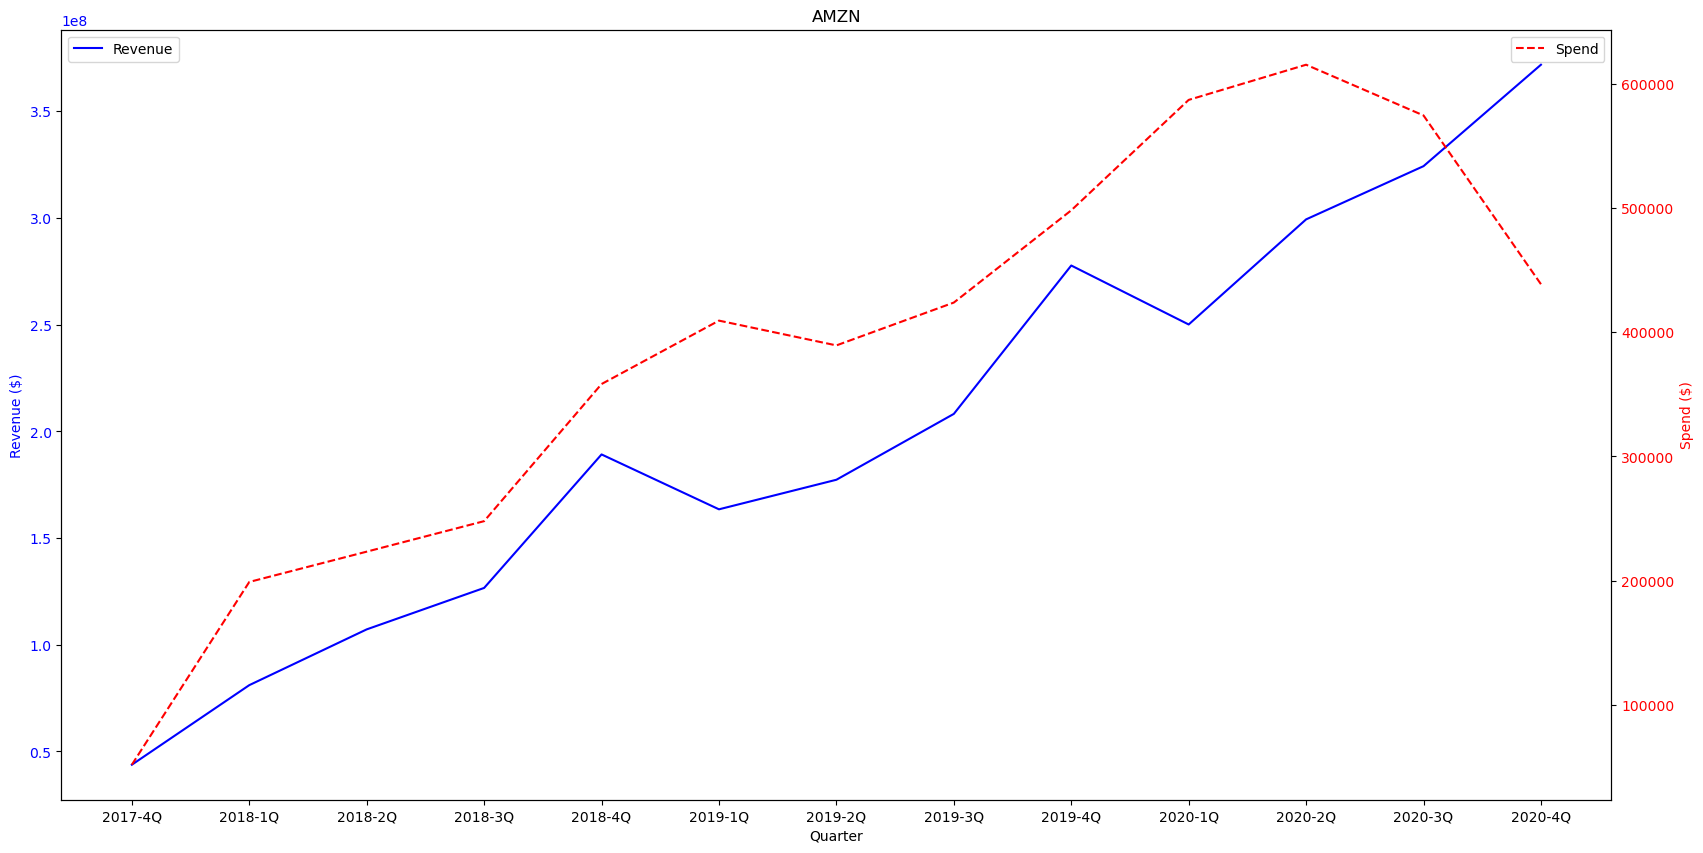

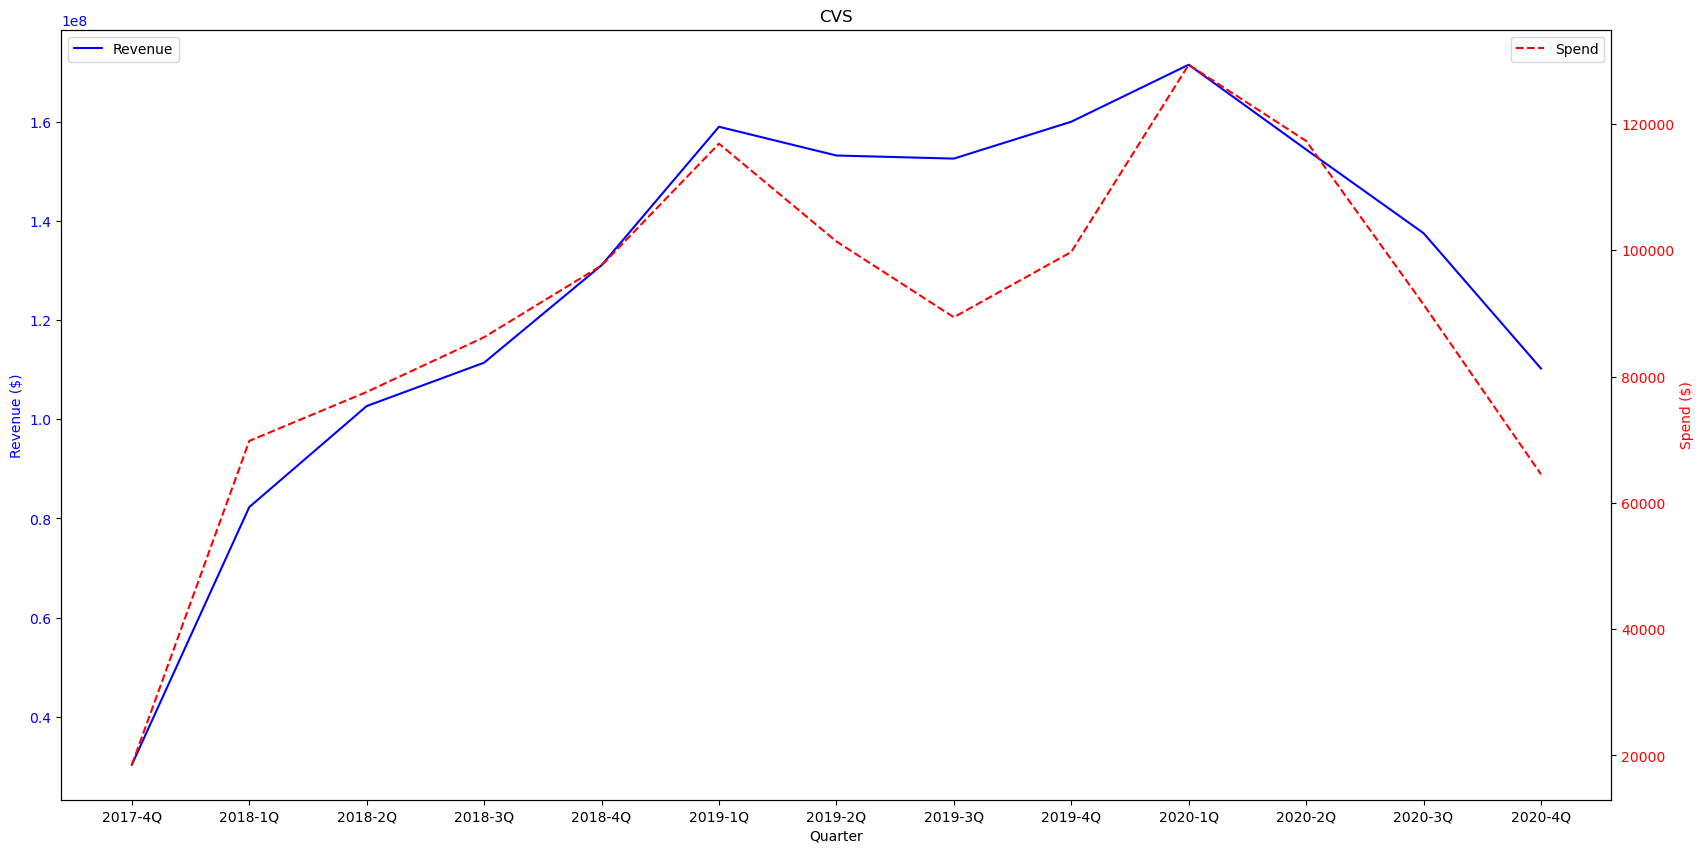

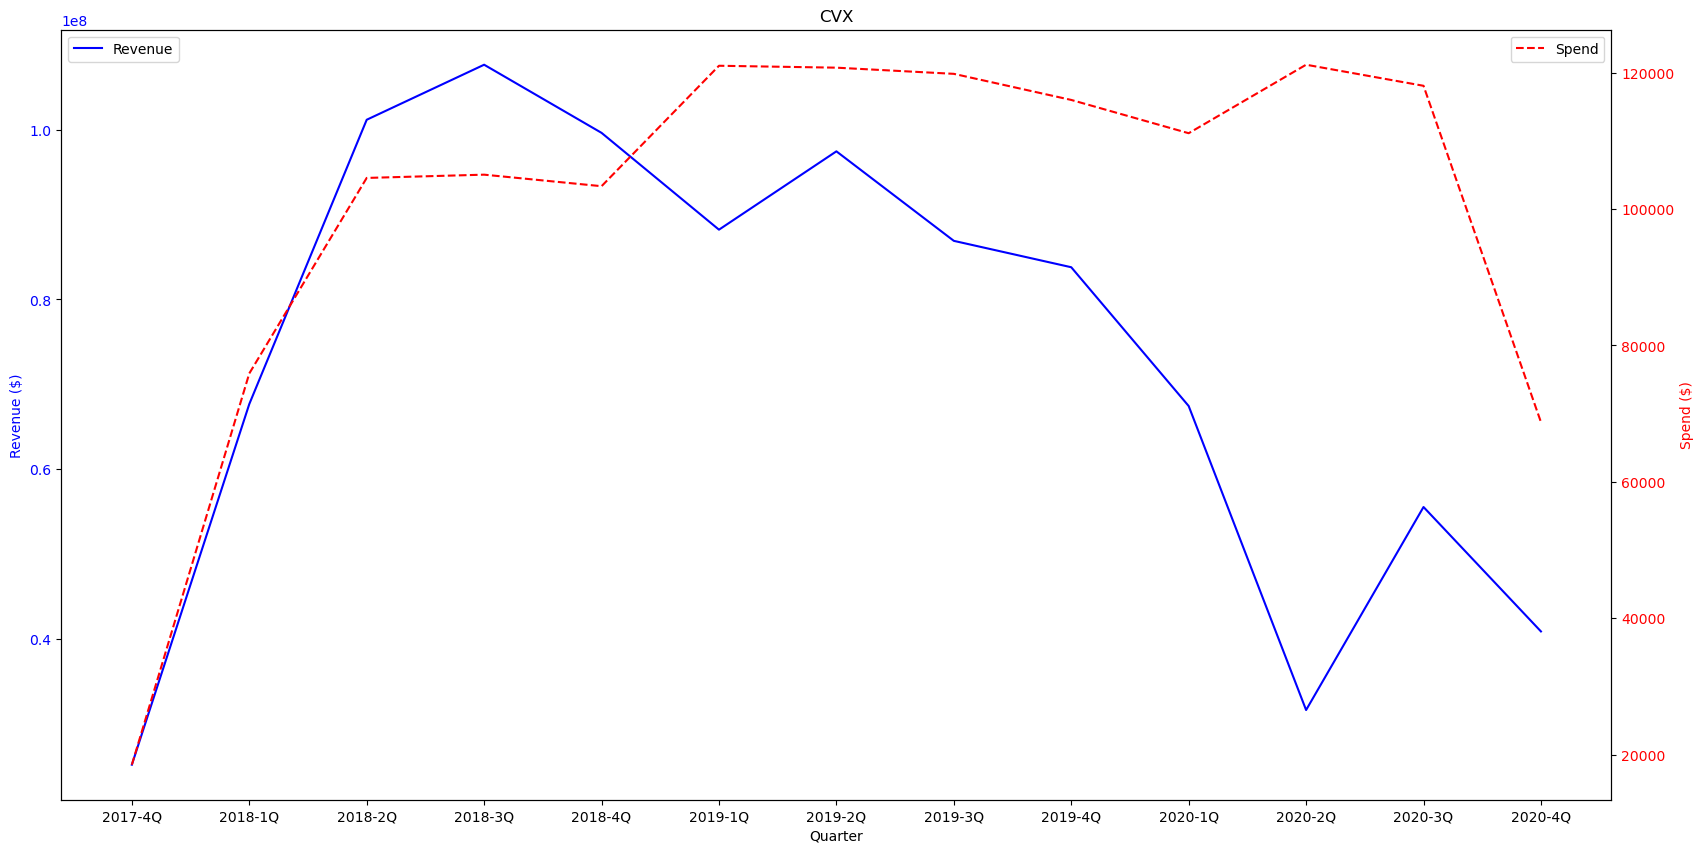

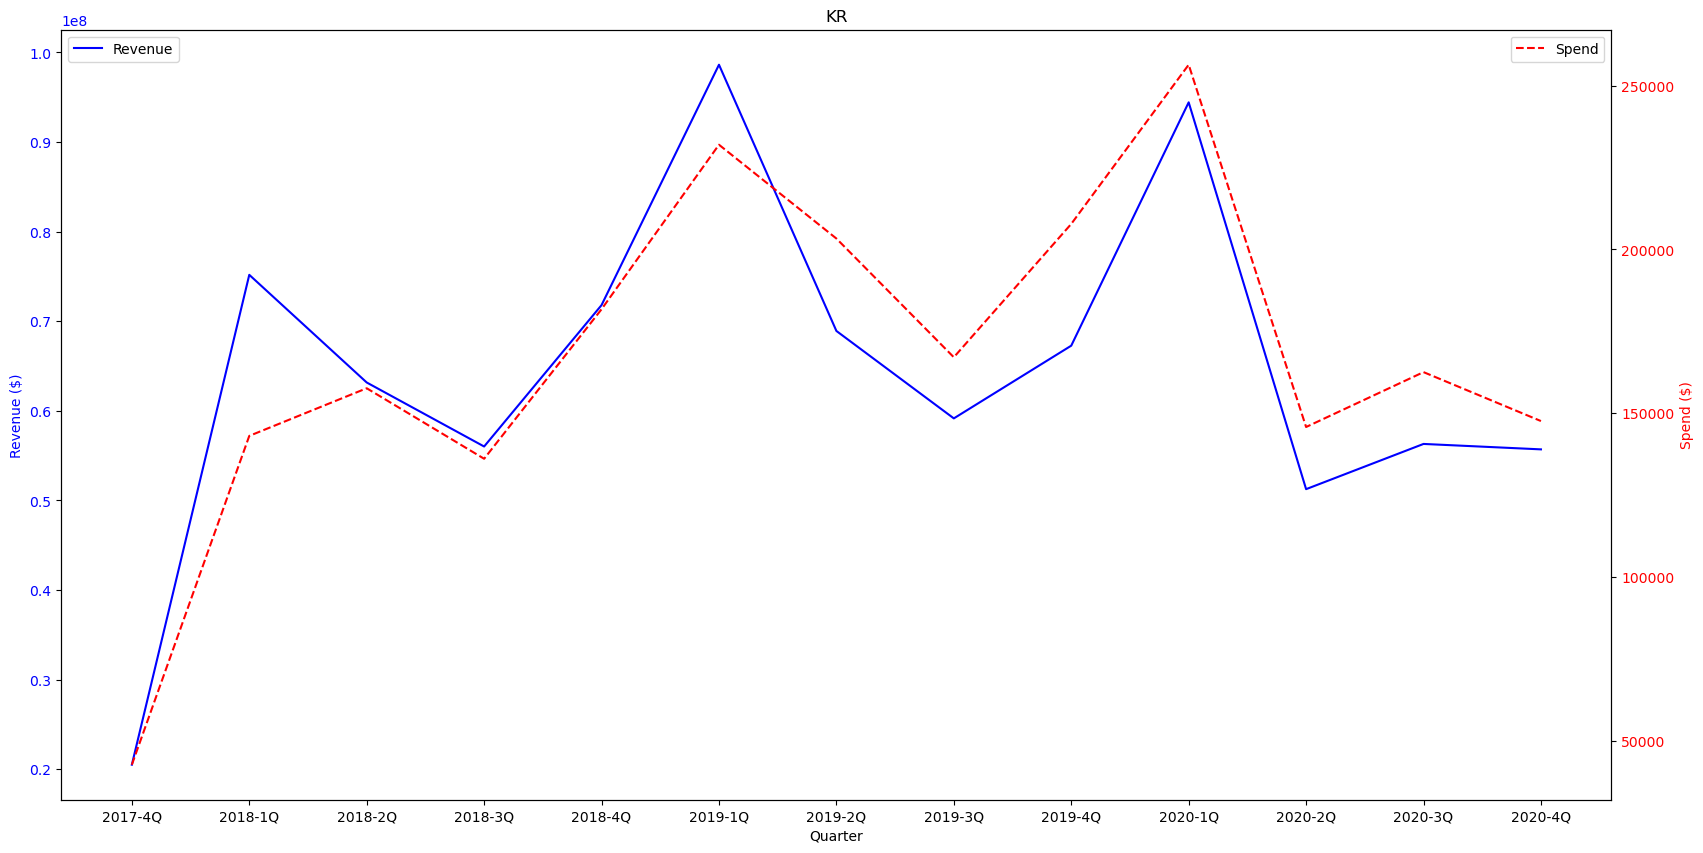

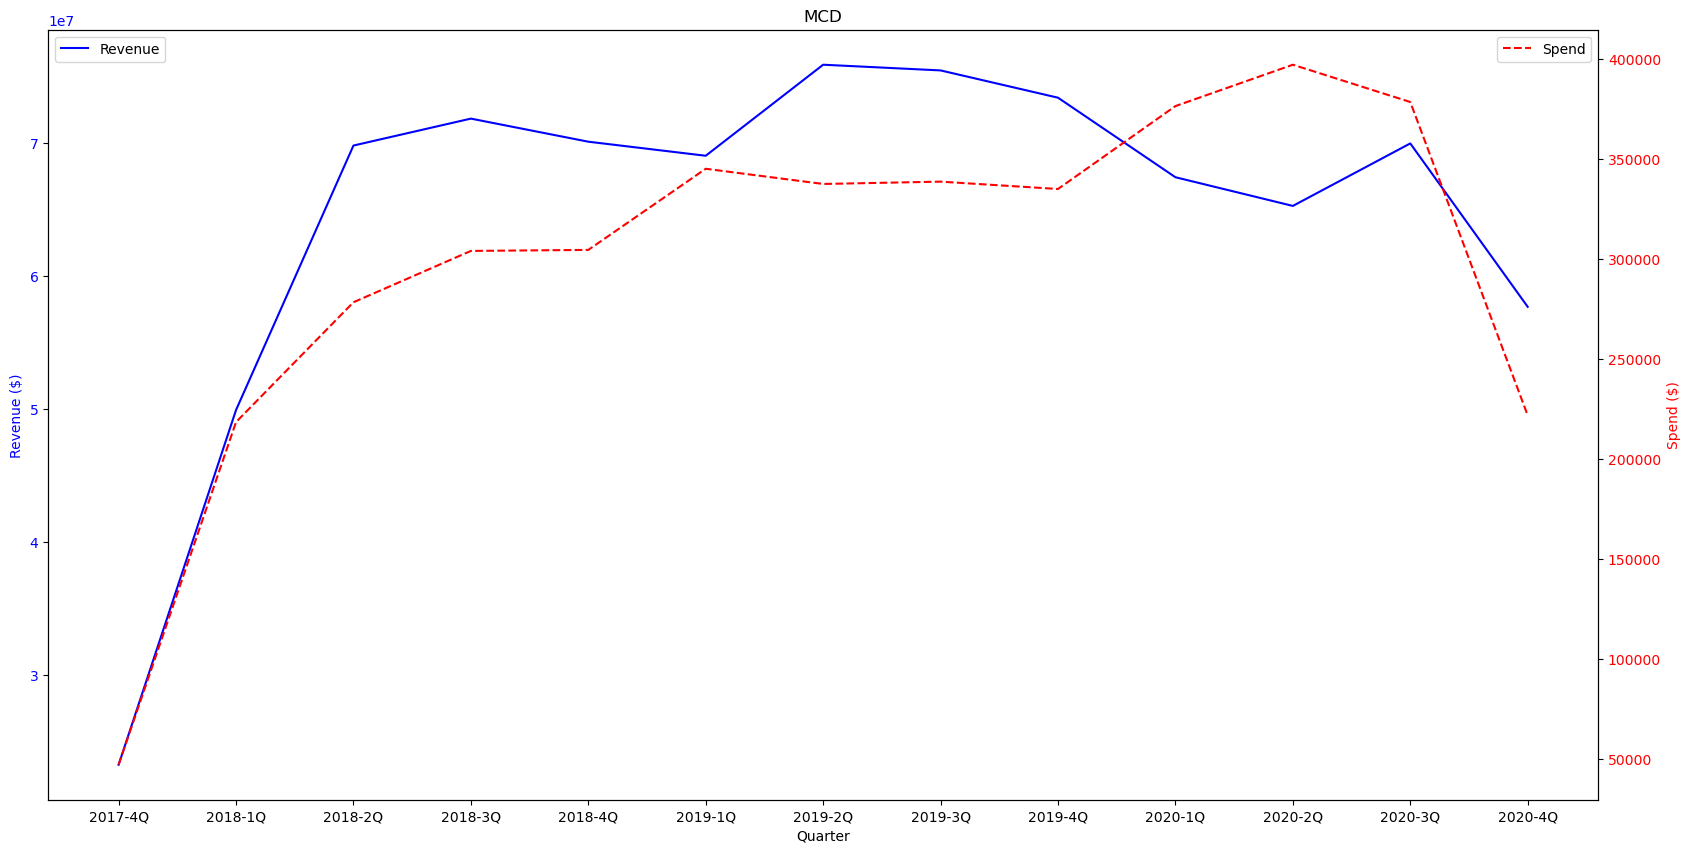

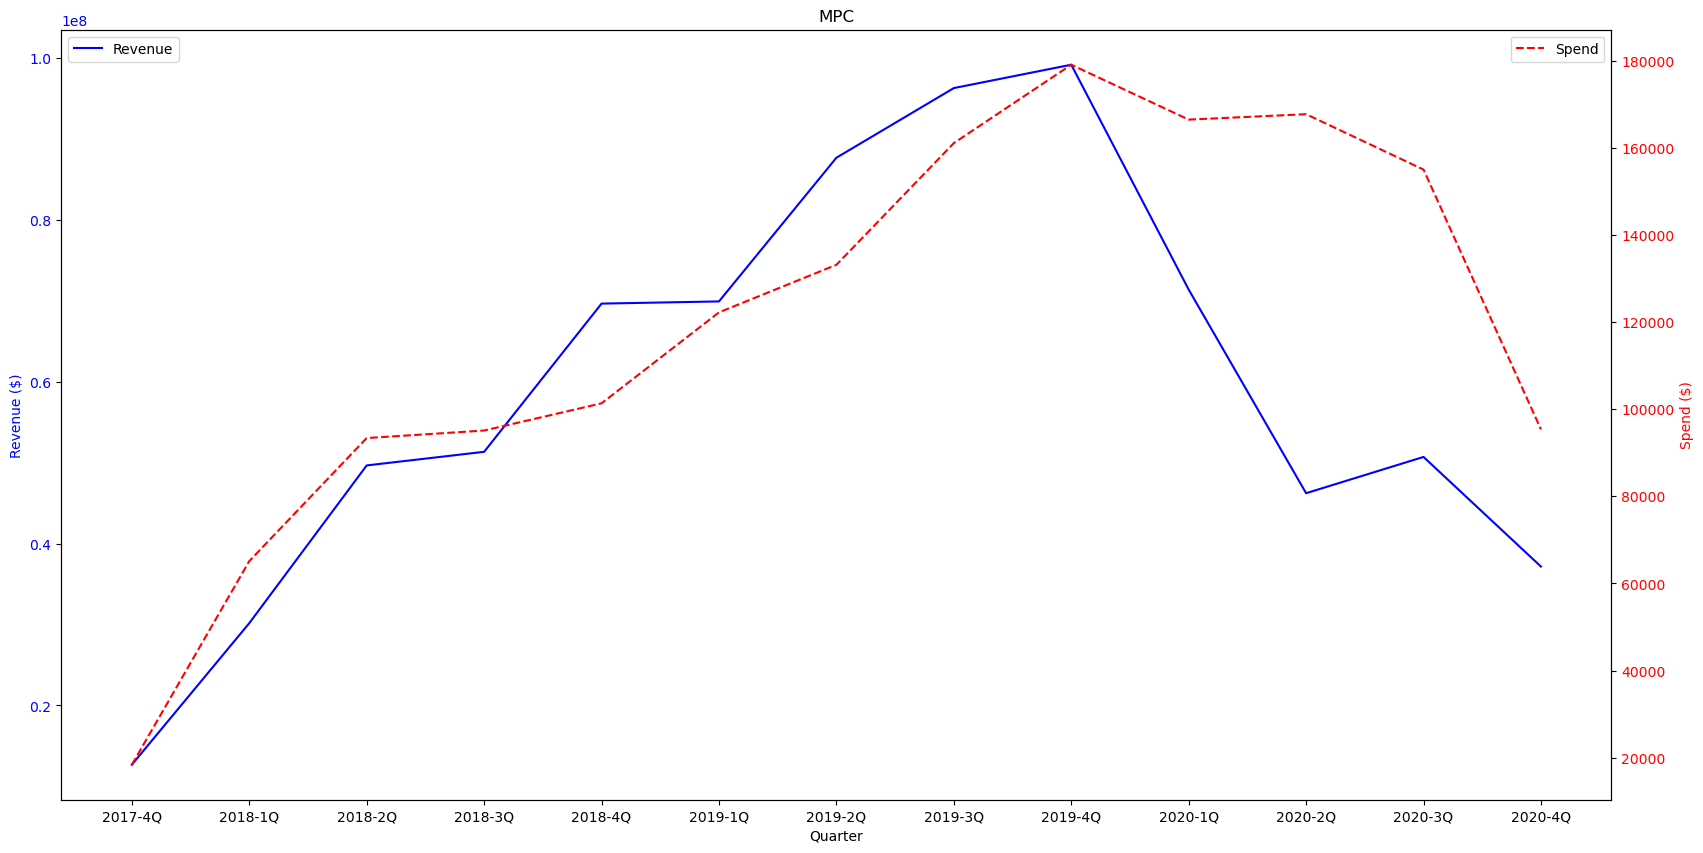

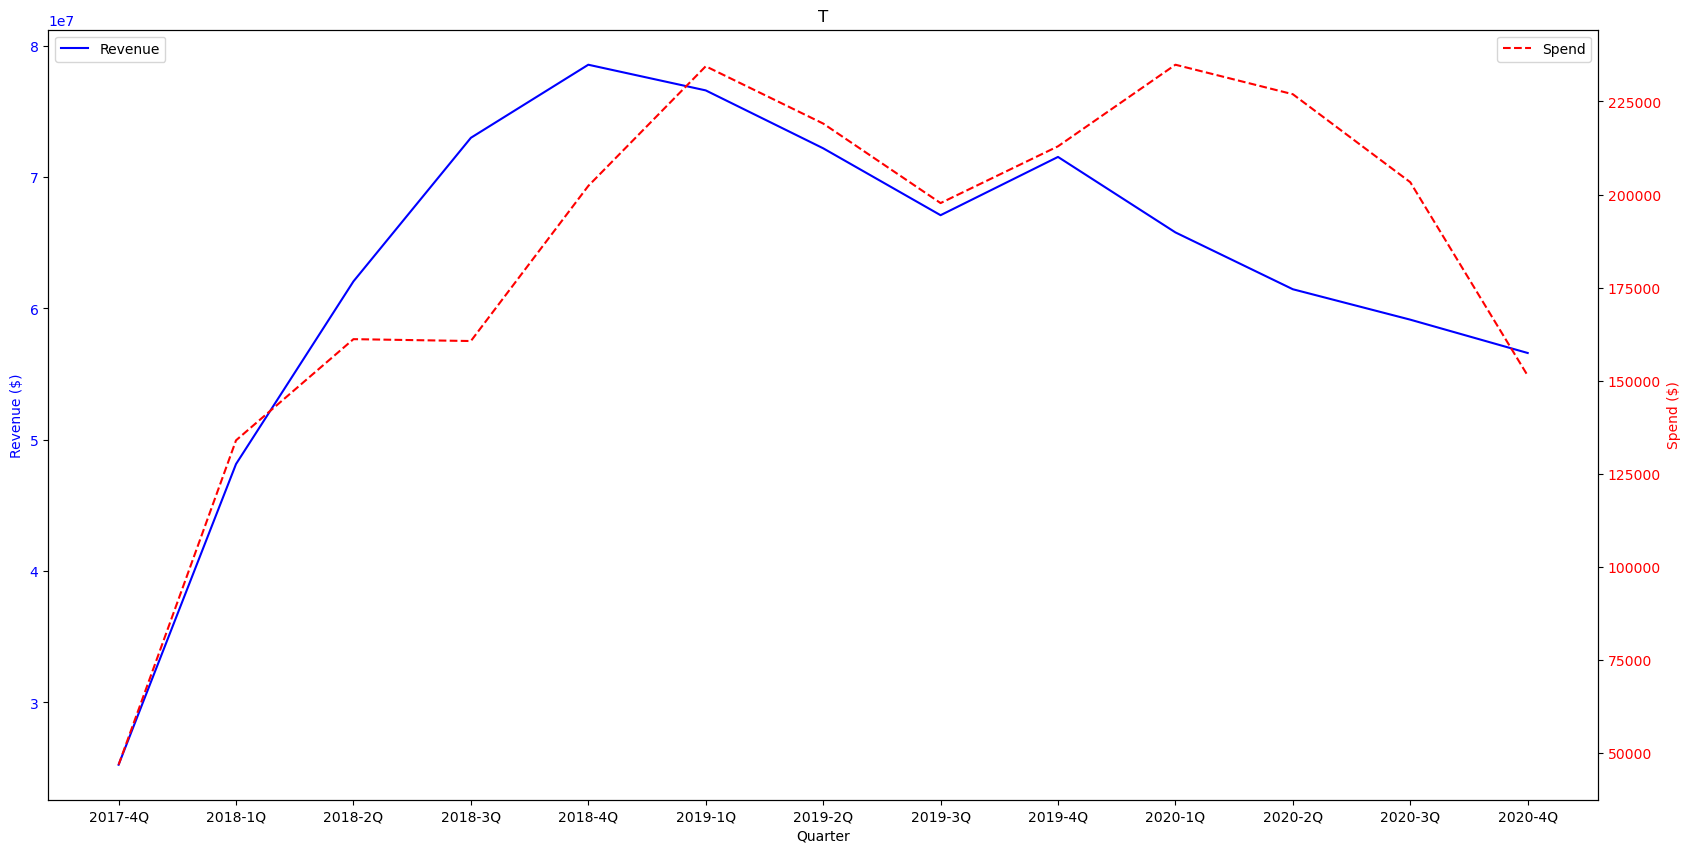

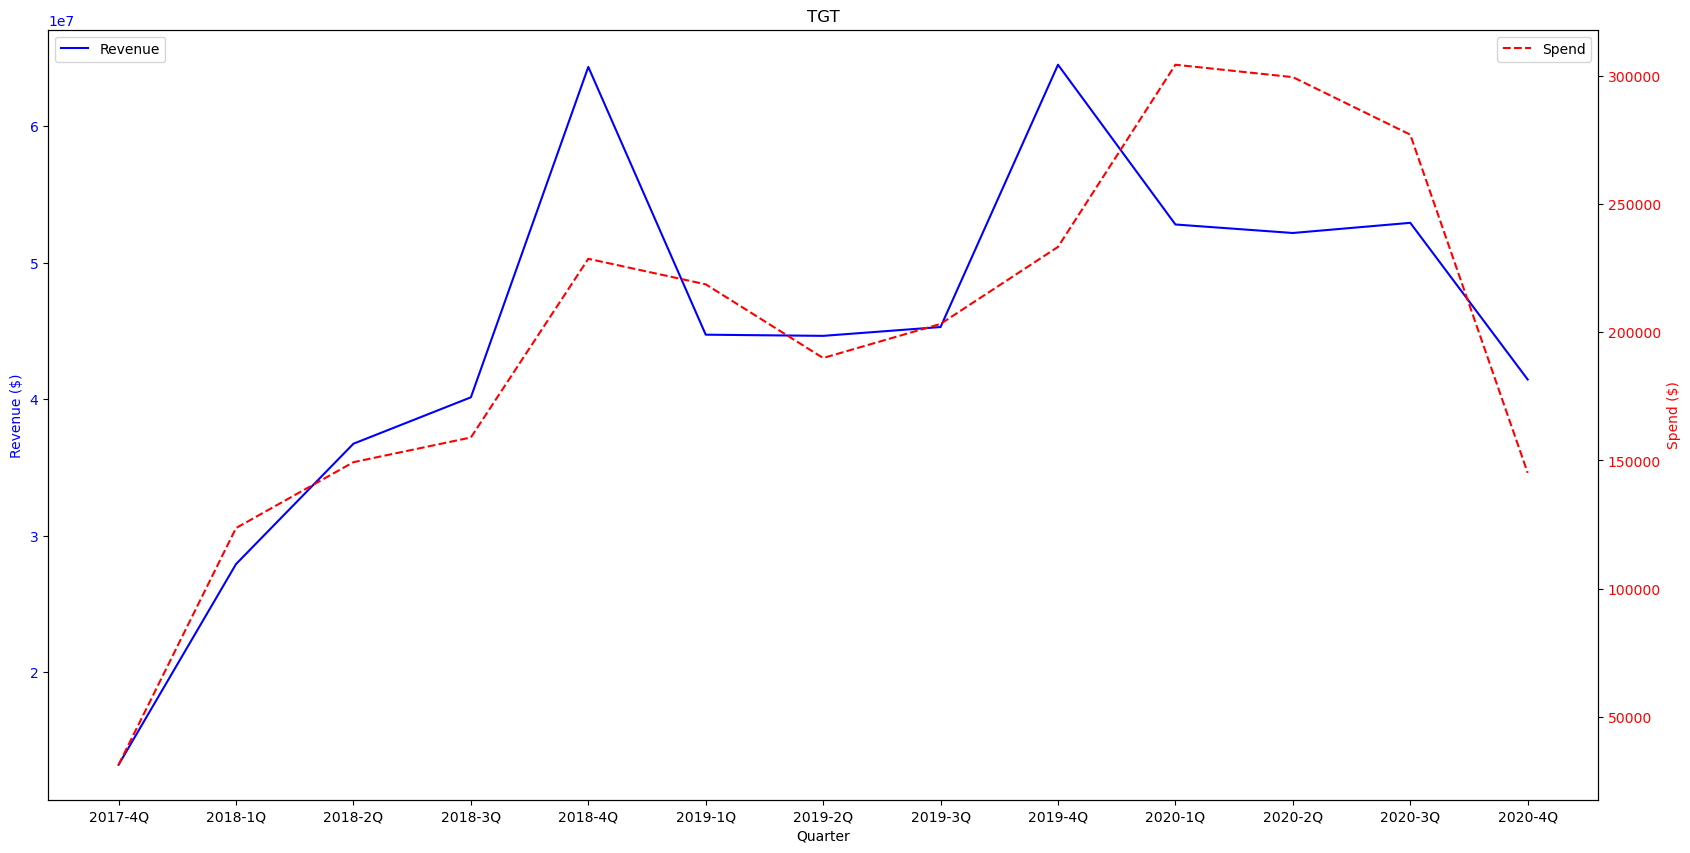

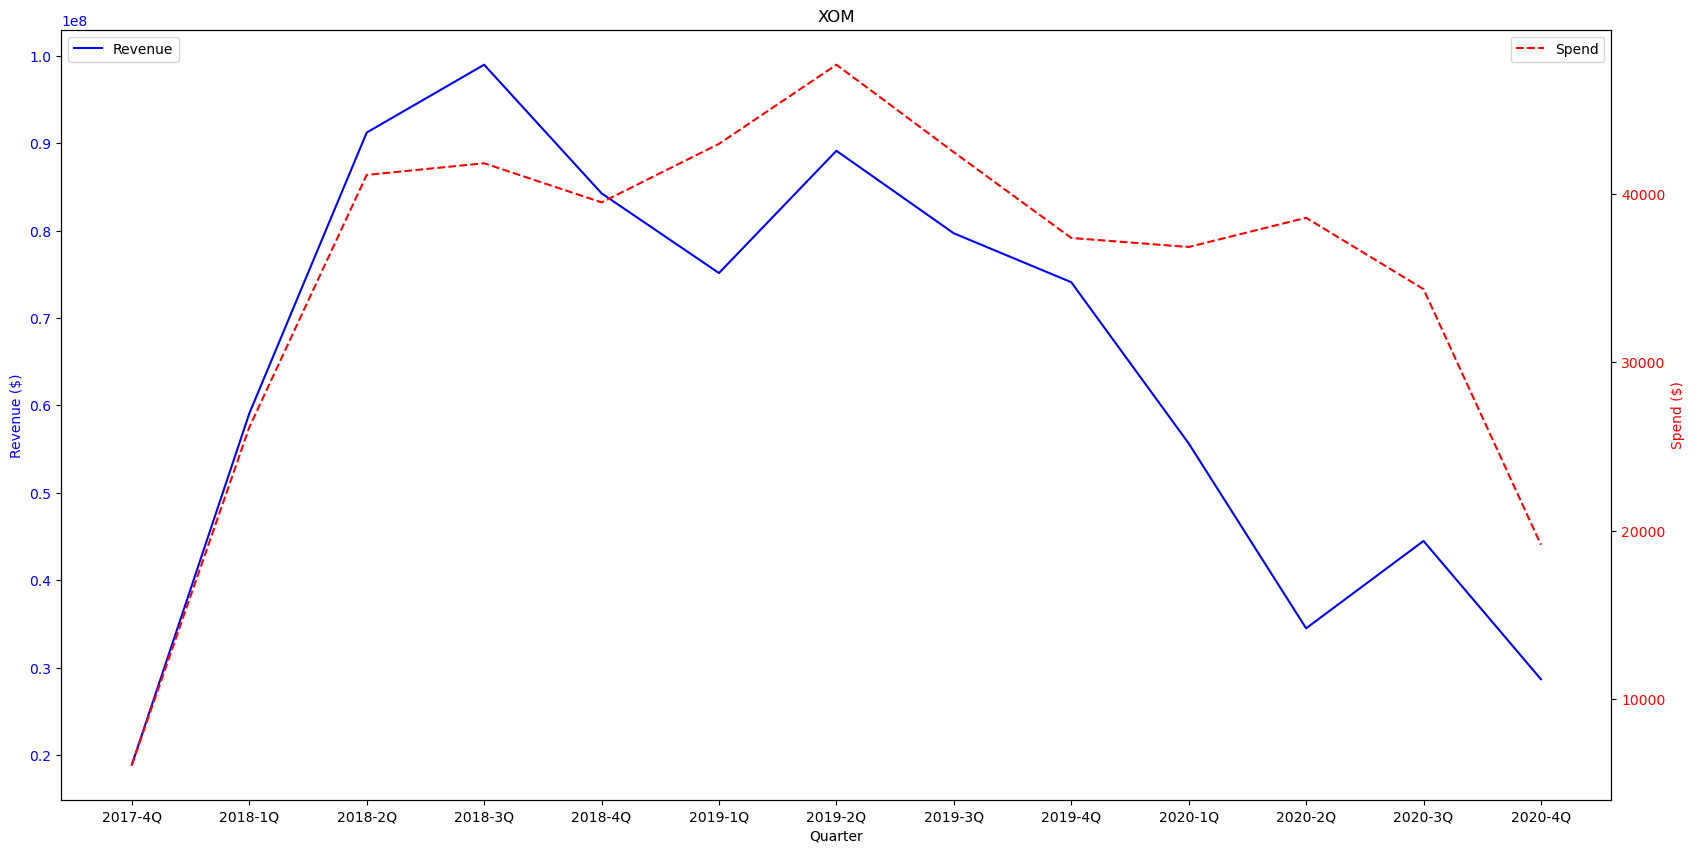

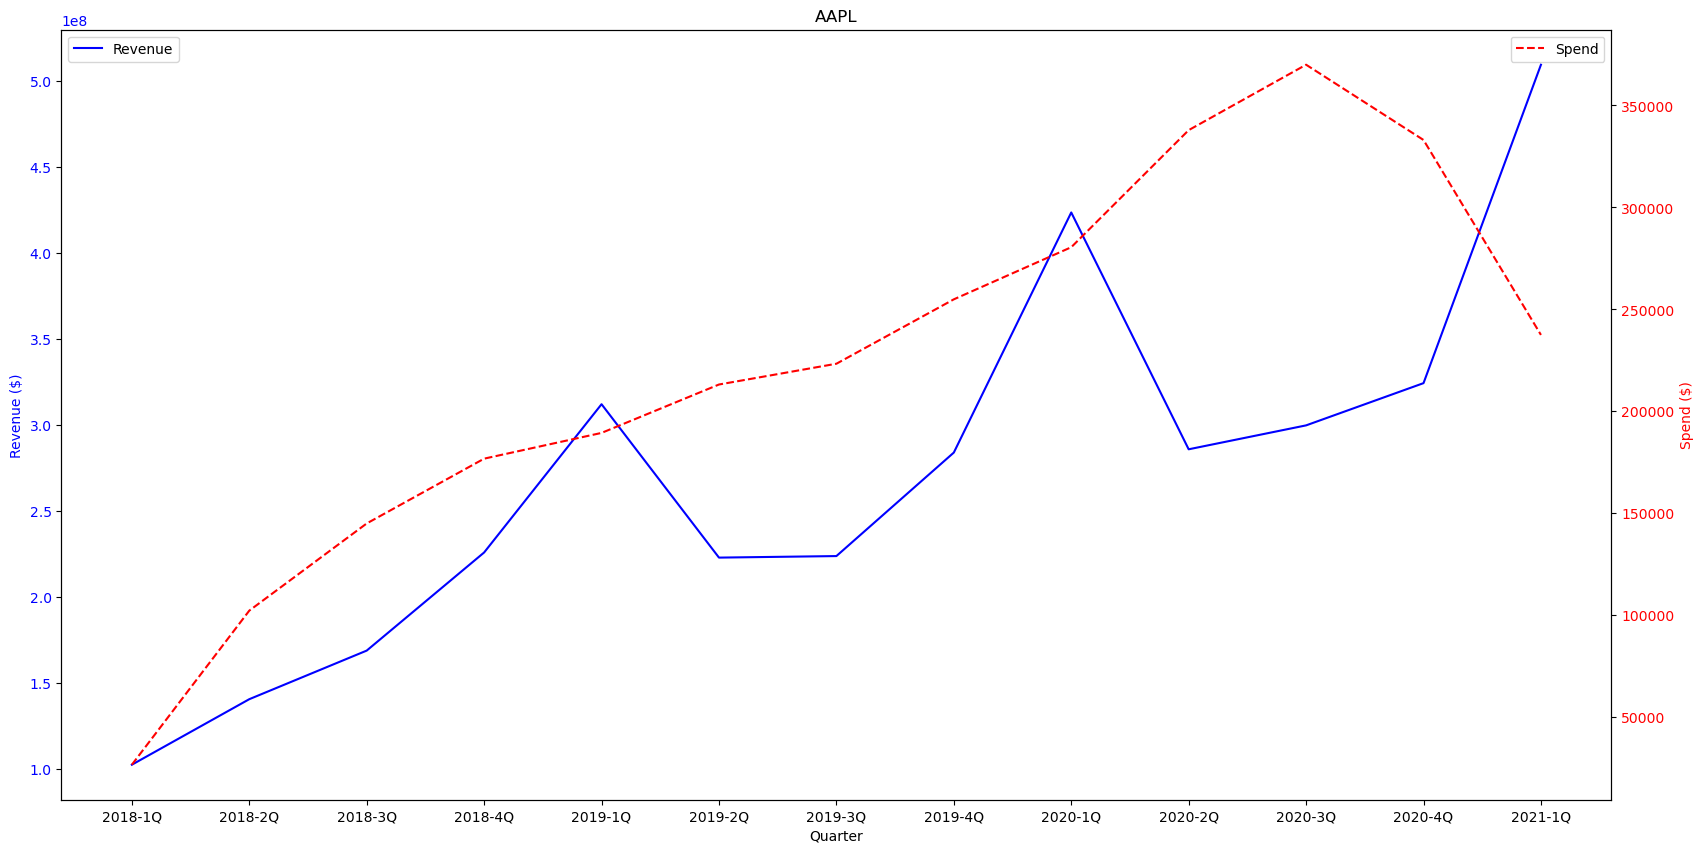

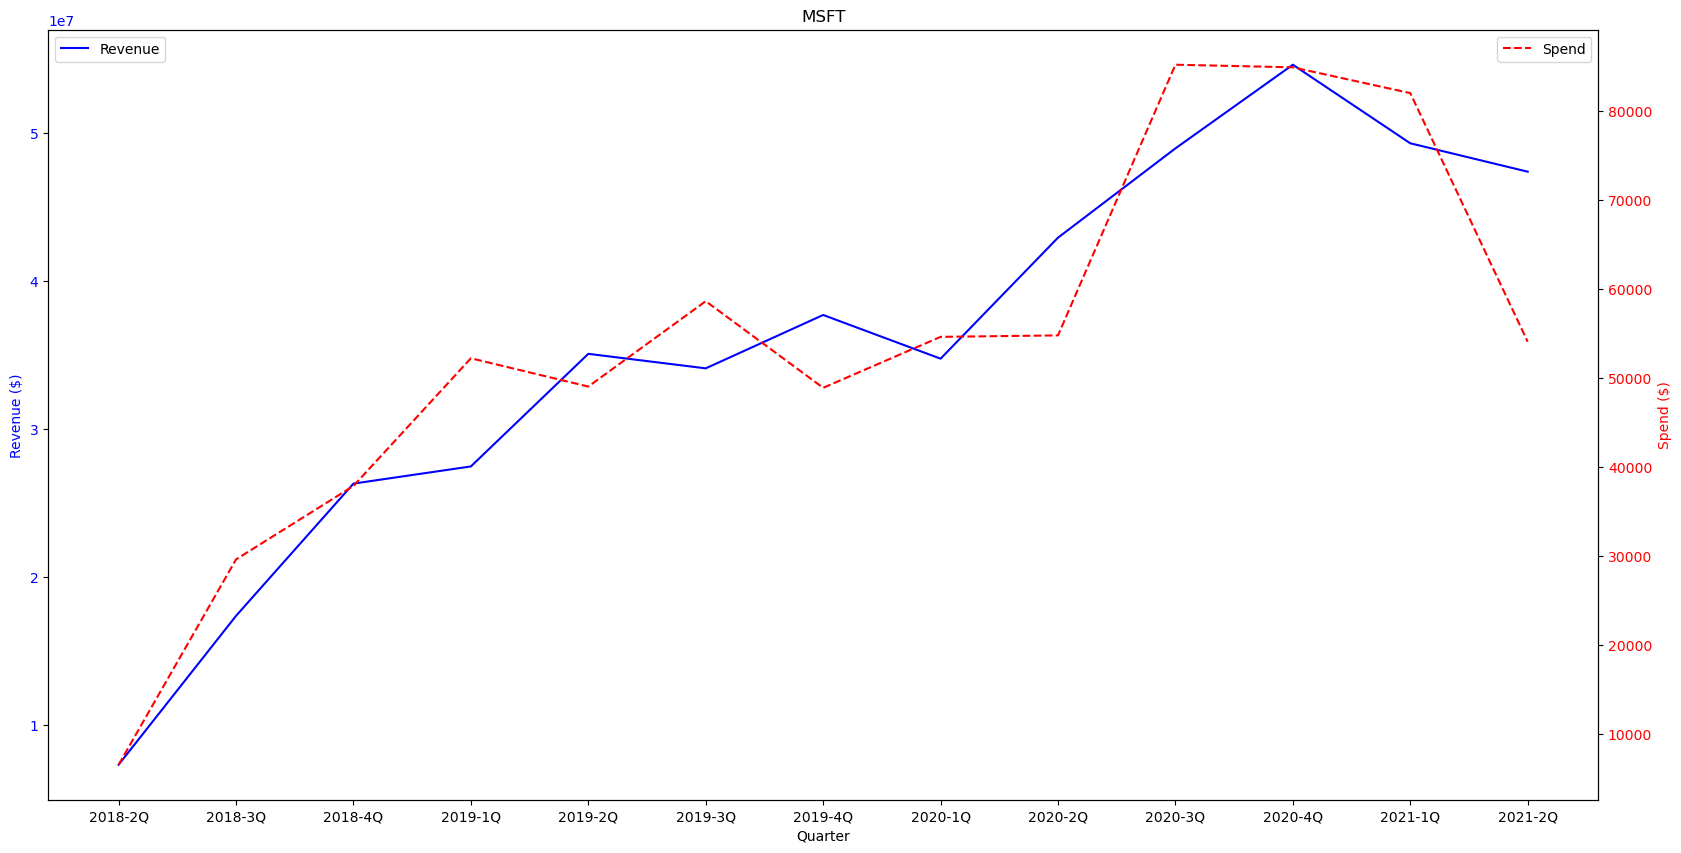

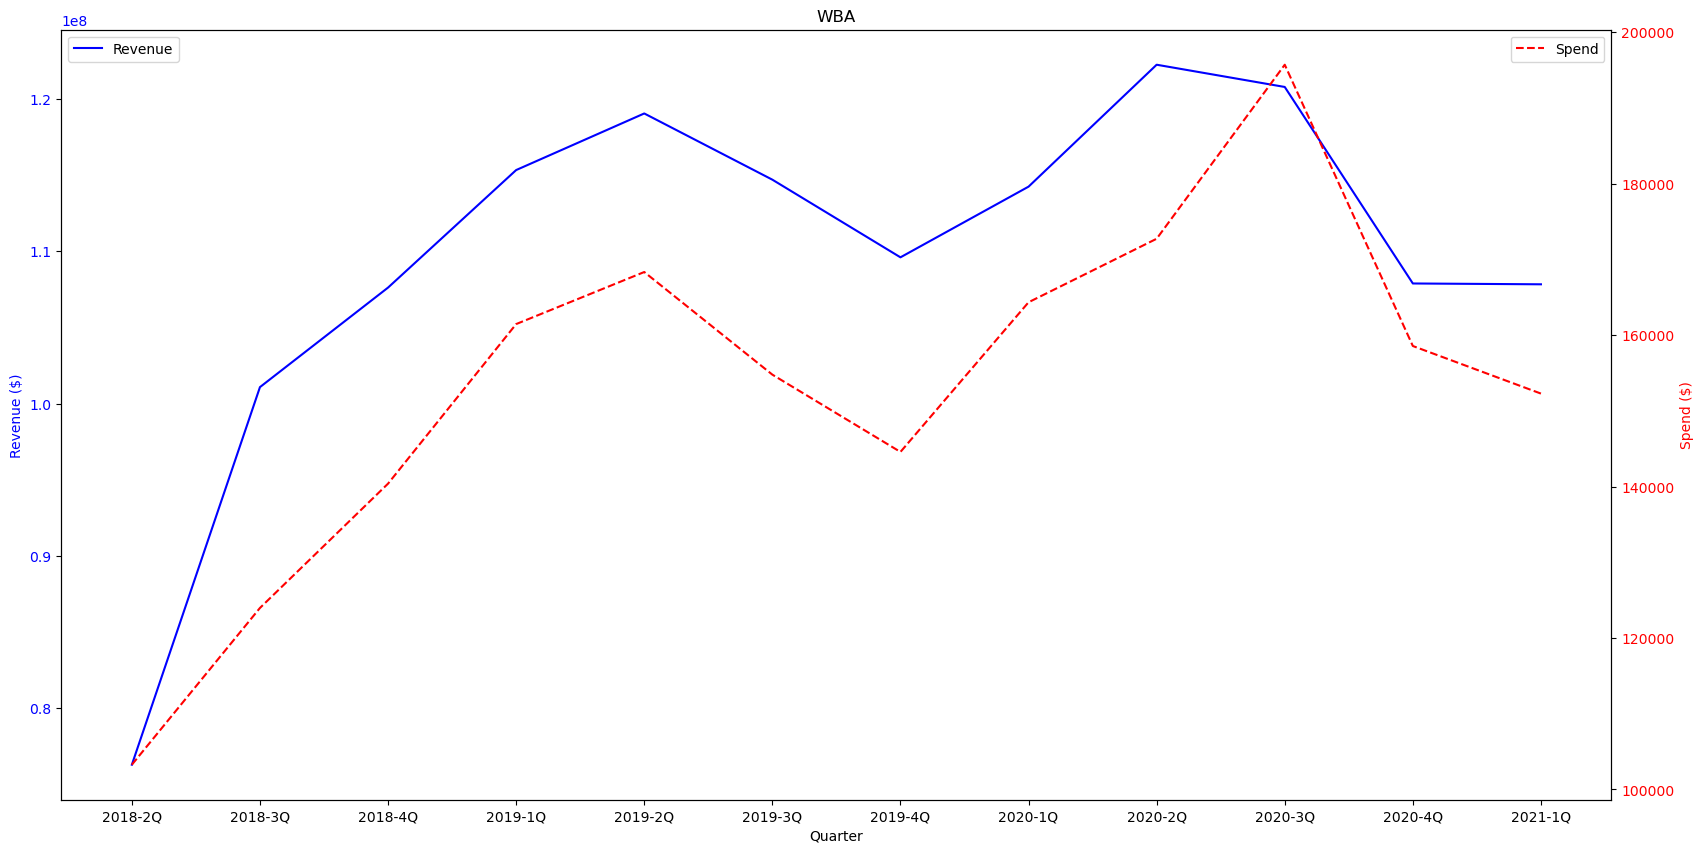

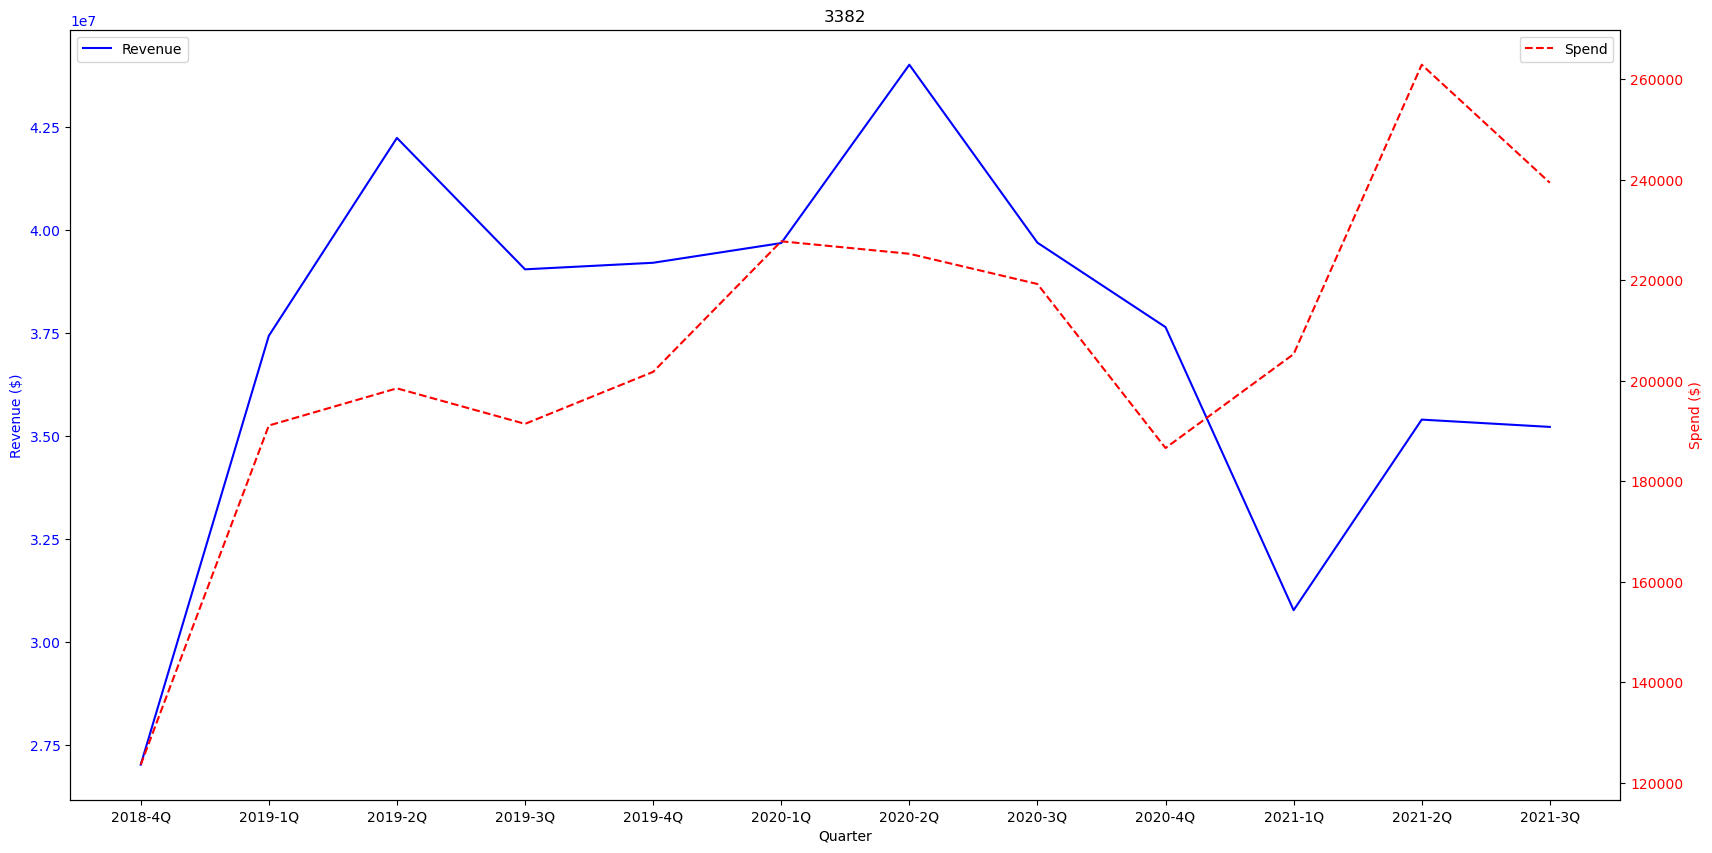

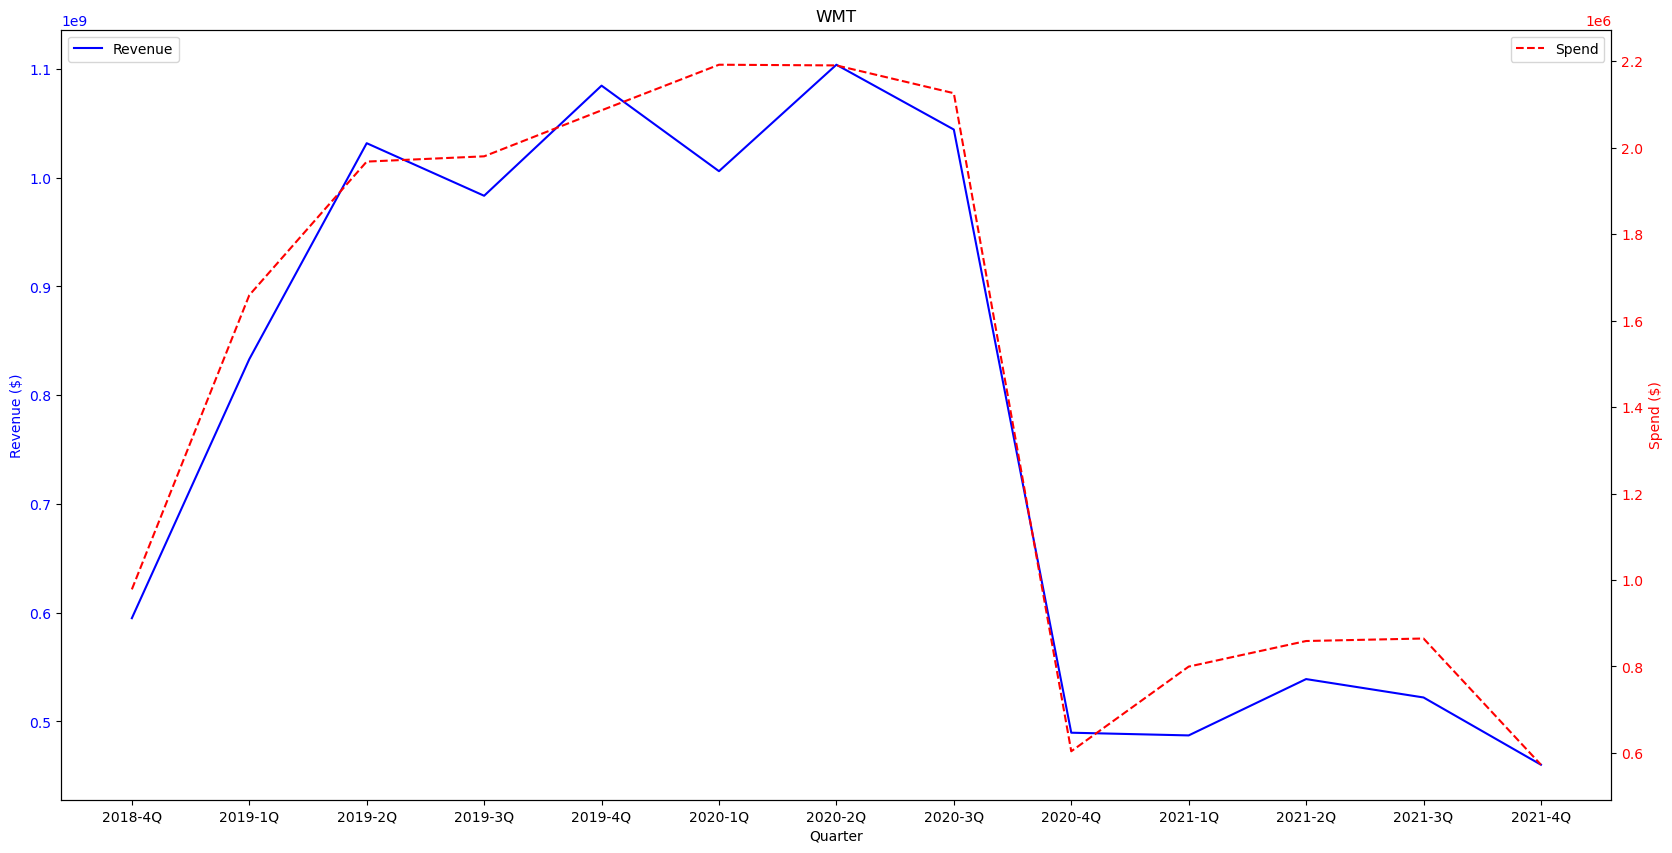

In [ ]:
# Show 15 line graphs with 2 lines on each: Total Spend and Reported Revenues
for i in range(len(revs)):

    fig, ax1 = plt.subplots(figsize=(20,10))
    ax1.plot(revs.columns, revs.iloc[i], 'b-', label='Revenue')
    ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Revenue ($)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax2 = ax1.twinx()
    ax2.plot(revs.columns, spends.iloc[i], 'r--', label='Spend')
    ax2.set_ylabel('Spend ($)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    plt.title(revs.index[i])
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

## Part 3:
For **NYSE:WMT**, read the sources (see below) for Fiscal 2020 and find their reporting segments. Each segment has segment revenues / net sales numbers reported. Find the correct combination of reporting revenue segments to map to our data's **NYSE:WMT company**. Remember, our data is U.S. (including Puerto Rico) only.

Once you have identified the revenue segments, create a mapping table. For each fiscal quarter, find the appropriate "apples-to-apples" Net sales numbers. Create a total revenue mapping between WMT fiscal quarters' "apples-to-apples" total reported Net sales and the sum of spend for that quarter in our data (using the mapping from step 1).

You can use the company's 10-Q and 10-K's to get this data, quarterly Earnings Presentations, or any other source.

**Show your work.**

In [ ]:
df_wmt = df_grouped[df_grouped['MERCHANT_TICKER'] == 'WMT']
df_wmt

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
362276   HAYNEEDLE             WMT              NYSE   
362277   HAYNEEDLE             WMT              NYSE   
362278   HAYNEEDLE             WMT              NYSE   
362279   HAYNEEDLE             WMT              NYSE   
362280   HAYNEEDLE             WMT              NYSE   
...            ...             ...               ...   
1691581    WALMART             WMT              NYSE   
1691582    WALMART             WMT              NYSE   
1691583    WALMART             WMT              NYSE   
1691584    WALMART             WMT              NYSE   
1691585    WALMART             WMT              NYSE   

                                          account FISCAL_QUARTER   spend  \
362276   a04:512:2C2961F27E4ADFDC9DA801276BD7A0AB        2018-4Q   44.14   
362277   a04:512:2C2961F27E4ADFDC9DA801276BD7A0AB        2018-4Q   44.14   
362278   a04:512:2C2961F27E4ADFDC9DA801276BD7A0AB        2018-4Q   44.14   
362279   a04:512:8EABC9465609D6603E10FD0AF2A1487E        2018-4Q  201.95   
362280   a04:512:8EABC9465609D6603E10FD0AF2A1487E        2018-4Q  201.95   
...                                           ...            ...     ...   
1691581                       b01:44132:973710379        2021-4Q  316.55   
1691582                       b01:44132:974188721        2021-4Q  328.55   
1691583                       b01:44132:975096837        2021-4Q  109.27   
1691584                       b01:44132:975106352        2021-4Q  264.22   
1691585                       b01:44132:975544339        2021-4Q   44.63   

                      KPINAME  KPIVALUE  
362276   Sam's Club Net Sales   15479.0  
362277   Walmart US Net Sales   86579.0  
362278   Walmart US Net Sales   86579.0  
362279   Sam's Club Net Sales   15479.0  
362280   Walmart US Net Sales   86579.0  
...                       ...       ...  
1691581  Walmart US Net Sales   99600.0  
1691582  Walmart US Net Sales   99600.0  
1691583  Walmart US Net Sales   99600.0  
1691584  Walmart US Net Sales   99600.0  
1691585  Walmart US Net Sales   99600.0  

[154350 rows x 8 columns]

In [ ]:
wmt_2020 = df_wmt[
    (df_wmt['FISCAL_QUARTER'].str.startswith('2020')) & 
    (df_wmt['MERCHANT_TICKER'] == 'WMT')
]

In [ ]:
print(wmt_2020['MERCHANT_EXCHANGE'].value_counts())

NYSE    57762
Name: MERCHANT_EXCHANGE, dtype: int64


In [ ]:
wmt_2020

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
1060714    BONOBOS             WMT              NYSE   
1060715    BONOBOS             WMT              NYSE   
1060716    BONOBOS             WMT              NYSE   
1144630  SAMS CLUB             WMT              NYSE   
1144631  SAMS CLUB             WMT              NYSE   
...            ...             ...               ...   
1615680    WALMART             WMT              NYSE   
1615681    WALMART             WMT              NYSE   
1615682    WALMART             WMT              NYSE   
1615683    WALMART             WMT              NYSE   
1615684    WALMART             WMT              NYSE   

                                          account FISCAL_QUARTER   spend  \
1060714  a04:512:C936C5F871DA818A6E420ADF36CA3E1A        2020-1Q  101.35   
1060715  a04:512:C936C5F871DA818A6E420ADF36CA3E1A        2020-1Q  101.35   
1060716  a04:512:C936C5F871DA818A6E420ADF36CA3E1A        2020-1Q  101.35   
1144630  a04:512:003F0421D8F4ED4BEFB68A0C39CE9D77        2020-1Q   46.71   
1144631  a04:512:003F0421D8F4ED4BEFB68A0C39CE9D77        2020-1Q   46.71   
...                                           ...            ...     ...   
1615680                       b01:44132:974188771        2020-4Q  125.67   
1615681                       b01:44132:975096837        2020-4Q   75.25   
1615682                       b01:44132:975106352        2020-4Q  165.10   
1615683                       b01:44132:975544339        2020-4Q  135.76   
1615684                       b01:44132:975572515        2020-4Q  280.57   

                      KPINAME  KPIVALUE  
1060714  Sam's Club Net Sales   13830.0  
1060715  Walmart US Net Sales   80344.0  
1060716  Walmart US Net Sales   80344.0  
1144630  Sam's Club Net Sales   13830.0  
1144631  Walmart US Net Sales   80344.0  
...                       ...       ...  
1615680  Walmart US Net Sales   92271.0  
1615681  Walmart US Net Sales   92271.0  
1615682  Walmart US Net Sales   92271.0  
1615683  Walmart US Net Sales   92271.0  
1615684  Walmart US Net Sales   92271.0  

[57762 rows x 8 columns]

In [ ]:
wmt_2020 = wmt_2020.groupby(['FISCAL_QUARTER', 'MERCHANT_TICKER'])[['spend', 'KPIVALUE']].sum()
wmt_2020

spend      KPIVALUE
FISCAL_QUARTER MERCHANT_TICKER                          
2020-1Q        WMT              2191727.31  1.005922e+09
2020-2Q        WMT              2190139.23  1.103792e+09
2020-3Q        WMT              2125880.13  1.044206e+09
2020-4Q        WMT               603774.10  4.896822e+08

In [ ]:
#Net Sales for WMT in USA in millions
net_sales = [94164, 100249, 97814, 107569]
wmt_2020['net_sales'] = net_sales
wmt_2020

spend      KPIVALUE  net_sales
FISCAL_QUARTER MERCHANT_TICKER                                     
2020-1Q        WMT              2191727.31  1.005922e+09      94164
2020-2Q        WMT              2190139.23  1.103792e+09     100249
2020-3Q        WMT              2125880.13  1.044206e+09      97814
2020-4Q        WMT               603774.10  4.896822e+08     107569

## Part 4 (Extra Credit):
Familiarize yourself with the CE survey. Identify tables / line items in the tables that can map directly to the credit card consumer data we are using in class. List as many dimensions of the CE survey as you can find which would make sense to map to our merchant-level credit card transaction data.

## Part 5:

Use an optimizer to create weights, one per each cluster from HW2, which minimizes MAPE between the reported revenues and total spend from our data.

The weights should be constrained to be between **1 and 15**.

To calculate the MAPE, you need to normalize the data for each company first.
Use the following companies in your analysis:

(WALMART, MCDONALDS, AMAZON, APPLE,  WENDYS, TACO BELL, BURGER KING, DOLLAR GENERAL). Find the ticker/exchange for these merchants and aggregate total spend on the ticker, not the merchant. Find the ticker/exchange for these merchants and aggregate total spend on the ticker, not the merchant.

The optimization function should multiply each cluster's spend by the weight, then sum all clusters, aggregate the total by Company/Fiscal Quarter from Part 2, compare to company revenues using MAPE (normalize first), and calculate the total MAPE across all company quarters.

Optimize the weights to minimize the total MAPE.

Show your work and results:Show the revenues, total spend, and MAPE for each company quarter and the total MAPE. Show each cluster's weights.

In [167]:
df_grouped

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
0        VITAMIN SHOPPE             FRG            NASDAQ   
1        VITAMIN SHOPPE             FRG            NASDAQ   
2        VITAMIN SHOPPE             FRG            NASDAQ   
3        VITAMIN SHOPPE             FRG            NASDAQ   
4        VITAMIN SHOPPE             FRG            NASDAQ   
...                 ...             ...               ...   
1691600           ZALES             SIG              NYSE   
1691601           ZALES             SIG              NYSE   
1691602           ZALES             SIG              NYSE   
1691603           ZALES             SIG              NYSE   
1691604           ZALES             SIG              NYSE   

                                          account FISCAL_QUARTER   spend  \
0        a04:512:0C3ED7C5973527A3F17AFC2146D76E54       -2019-4Q   10.19   
1        a04:512:161676DD690B85A1A7C4CCF745D8520C       -2019-4Q   84.44   
2        a04:512:19AC012751A7B6105911BC59C29A3220       -2019-4Q    4.20   
3        a04:512:23A263114A7EAD7A3E6A93D99AA893AE       -2019-4Q   13.56   
4        a04:512:291BACB7A85292738CE724AEF0A62A10       -2019-4Q   13.77   
...                                           ...            ...     ...   
1691600  a04:512:E3F232F4A6FC96E27D30972B46A91EDC        2021-4Q  116.83   
1691601  a04:512:F5F7D4C3E1C4B603E4E2A8398107CBEB        2021-4Q   90.27   
1691602                       b01:44132:934996711        2021-4Q   27.27   
1691603                       b01:44132:941849039        2021-4Q   84.80   
1691604                       b01:44132:947958388        2021-4Q  106.18   

         KPINAME  KPIVALUE  
0            NaN       NaN  
1            NaN       NaN  
2            NaN       NaN  
3            NaN       NaN  
4            NaN       NaN  
...          ...       ...  
1691600  Revenue    2186.5  
1691601  Revenue    2186.5  
1691602  Revenue    2186.5  
1691603  Revenue    2186.5  
1691604  Revenue    2186.5  

[1691605 rows x 8 columns]

In [168]:
companies_li = ['WALMART', 'MCDONALDS', 'AMAZON', 'APPLE',  'WENDYS', 'TACO BELL', 'BURGER KING', 'DOLLAR GENERAL']
tickers_li = ['WMT', 'MCD', 'AMZN', 'AAPL', 'WEN', 'YUM', 'QSR', 'DG']

In [169]:
set(df_grouped.merchant).intersection(set(companies_li))

{'AMAZON',
 'APPLE',
 'BURGER KING',
 'DOLLAR GENERAL',
 'MCDONALDS',
 'TACO BELL',
 'WALMART',
 'WENDYS'}

In [170]:
df_grouped_part5 = df_grouped[df_grouped['merchant'].isin(companies_li)]
#df_grouped_part5 = df_grouped_part5[df_grouped_part5['MERCHANT_TICKER'].isin(tickers_li)]
df_grouped_part5

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
416       AMAZON            AMZN            NASDAQ   
417       AMAZON            AMZN            NASDAQ   
418       AMAZON            AMZN            NASDAQ   
419       AMAZON            AMZN            NASDAQ   
420       AMAZON            AMZN            NASDAQ   
...          ...             ...               ...   
1691581  WALMART             WMT              NYSE   
1691582  WALMART             WMT              NYSE   
1691583  WALMART             WMT              NYSE   
1691584  WALMART             WMT              NYSE   
1691585  WALMART             WMT              NYSE   

                                          account FISCAL_QUARTER   spend  \
416      a04:512:000ACA1D00B403C9BD4848010BBBCB63        2017-4Q    4.72   
417      a04:512:002038B3B84497A0947BAFF4A237C8B1        2017-4Q  153.09   
418      a04:512:00C237994685905D704F0F4E3349EFF9        2017-4Q   56.72   
419      a04:512:00C8B9610382909000A3F99574A4859D        2017-4Q   10.74   
420      a04:512:00D49AE488400D8B9178C77D86B109E2        2017-4Q   11.18   
...                                           ...            ...     ...   
1691581                       b01:44132:973710379        2021-4Q  316.55   
1691582                       b01:44132:974188721        2021-4Q  328.55   
1691583                       b01:44132:975096837        2021-4Q  109.27   
1691584                       b01:44132:975106352        2021-4Q  264.22   
1691585                       b01:44132:975544339        2021-4Q   44.63   

                       KPINAME  KPIVALUE  
416      North America Revenue   37302.0  
417      North America Revenue   37302.0  
418      North America Revenue   37302.0  
419      North America Revenue   37302.0  
420      North America Revenue   37302.0  
...                        ...       ...  
1691581   Walmart US Net Sales   99600.0  
1691582   Walmart US Net Sales   99600.0  
1691583   Walmart US Net Sales   99600.0  
1691584   Walmart US Net Sales   99600.0  
1691585   Walmart US Net Sales   99600.0  

[483709 rows x 8 columns]

In [171]:
df_grouped_part5.merchant.unique()

array(['AMAZON', 'BURGER KING', 'DOLLAR GENERAL', 'MCDONALDS',
       'TACO BELL', 'WENDYS', 'APPLE', 'WALMART'], dtype=object)

<Axes: title={'center': 'Normalized Spend'}, xlabel='merchant'>

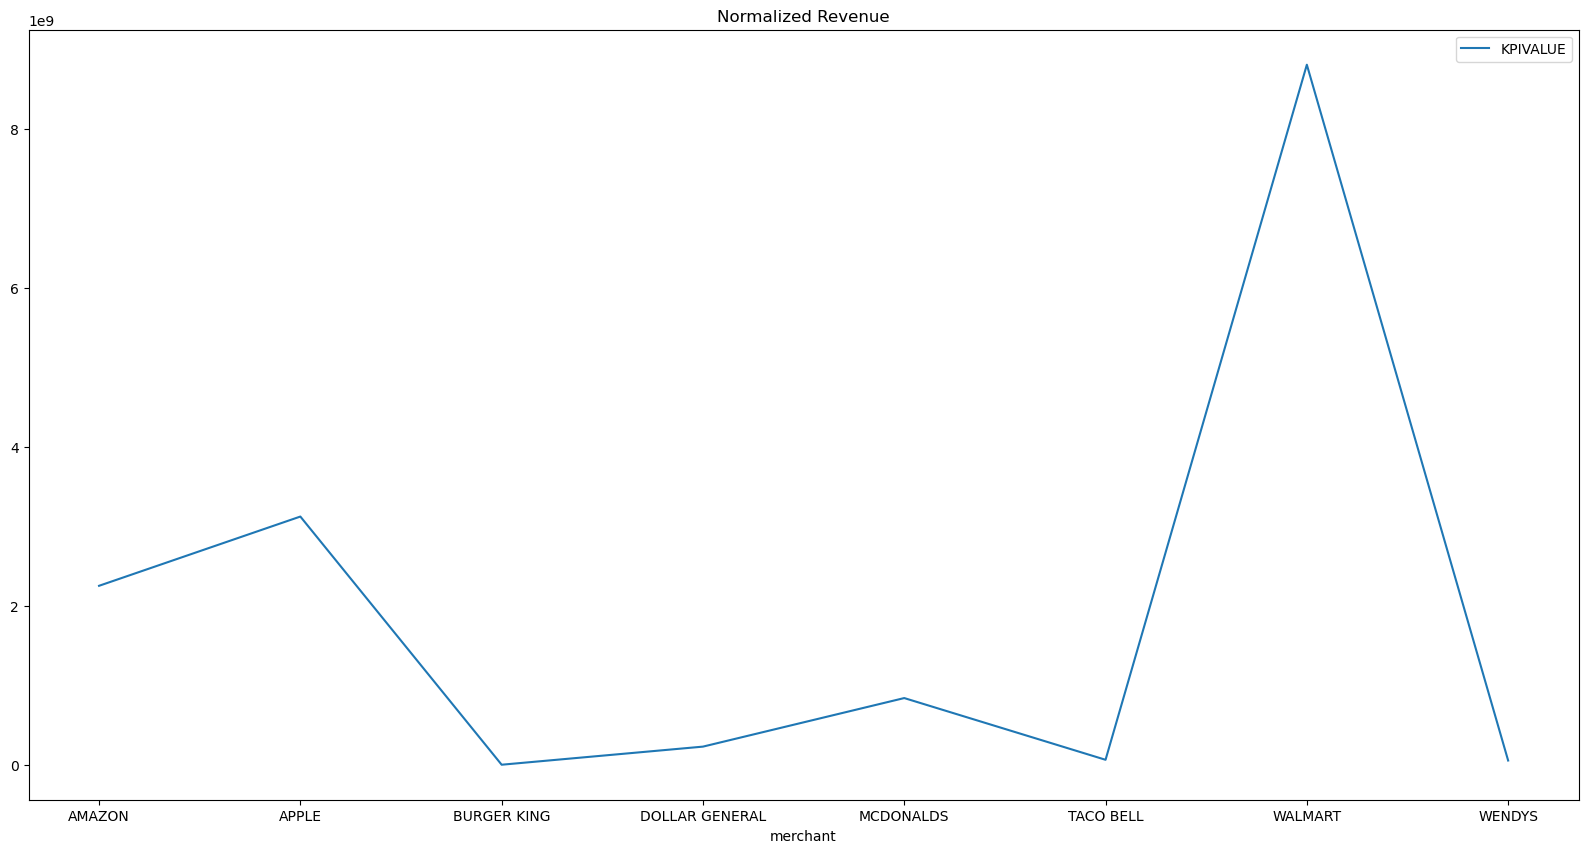

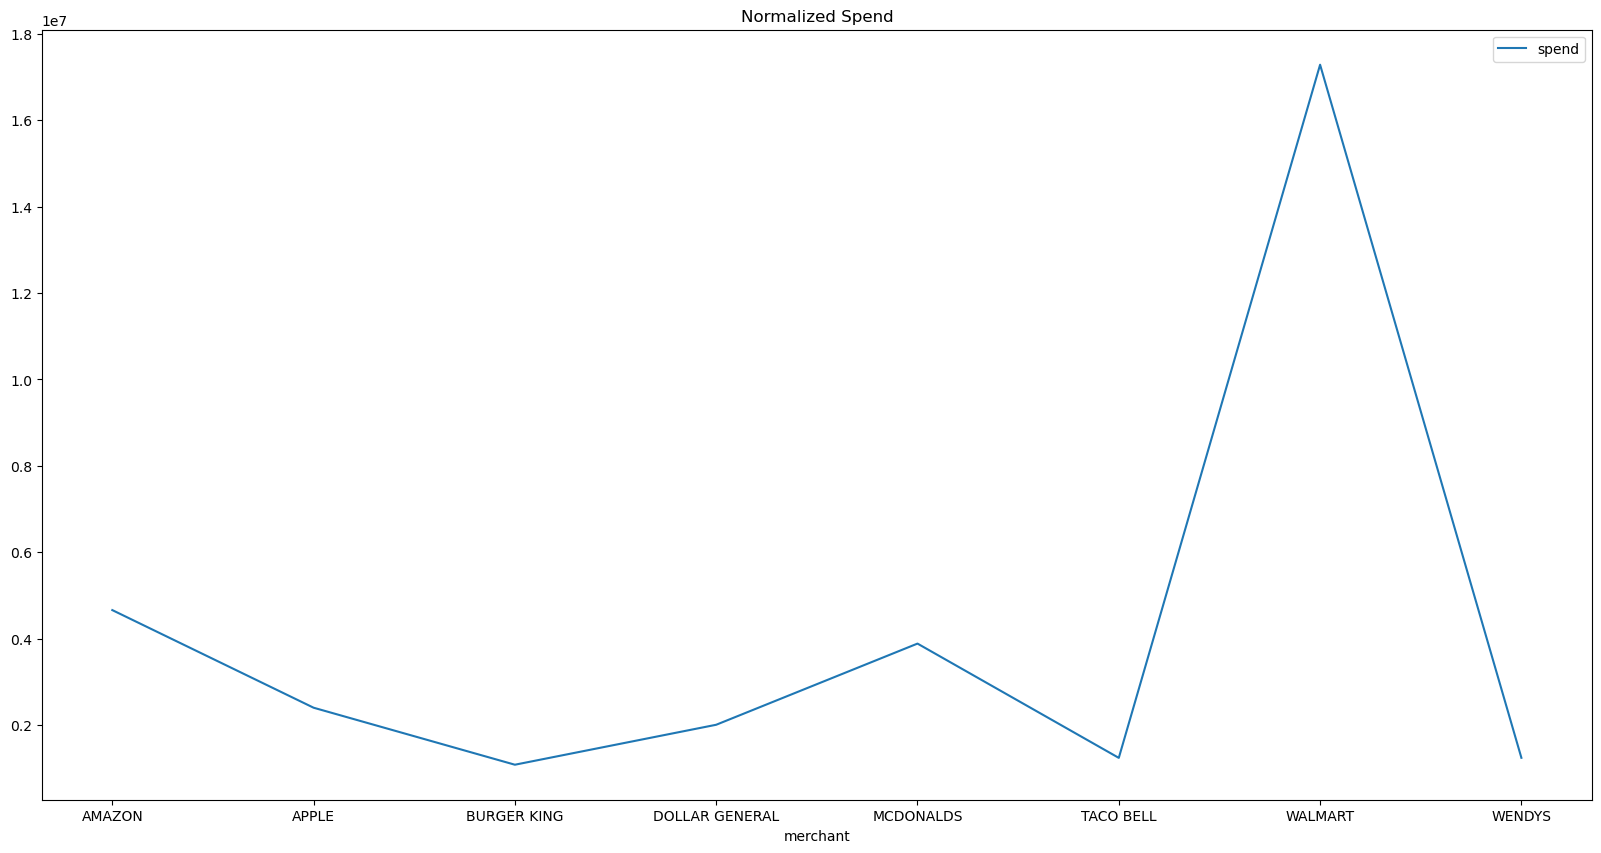

In [172]:
# Plot total spend's and revenues for each company
df_grouped_part5.groupby('merchant')[['KPIVALUE']].sum().plot(figsize=(20,10), title='Normalized Revenue')
df_grouped_part5.groupby('merchant')[['spend']].sum().plot(figsize=(20,10), title='Normalized Spend')

In [173]:
# For each cluster we will have ...
# company, ticker, exchange, account, fiscal_quarter, spend, revenue, cluster_number, cluster_weight
#
# Now, we do the following
# (1) spend*cluster_weight
# (2) predict company's quarter revenue by sum of spend*cluster_weight's associated with the current company and quarter
# (3) show revenue, total spend, MAPE for each company/quarter and total

# Get clusters from HW 2
acnt_date_merc_spend = df[['account', 'date', 'merchant', 'spend']].copy()
acnt_date_merc_spend['date'] = pd.to_datetime(df['date']).dt.date
acnt_date_merc_spend

account        date  \
0        a04:512:000ACA1D00B403C9BD4848010BBBCB63  2018-01-01   
1        a04:512:000ACA1D00B403C9BD4848010BBBCB63  2018-01-01   
2        a04:512:000ACA1D00B403C9BD4848010BBBCB63  2018-01-01   
3        a04:512:000ACA1D00B403C9BD4848010BBBCB63  2018-01-01   
4        a04:512:000ACA1D00B403C9BD4848010BBBCB63  2018-02-01   
...                                           ...         ...   
4242940  a04:512:E61B330AB05882BB6F20F35565F07E64  2018-02-01   
4242941  a04:512:E61B330AB05882BB6F20F35565F07E64  2018-02-01   
4242942  a04:512:E61B330AB05882BB6F20F35565F07E64  2018-02-01   
4242943  a04:512:E61B330AB05882BB6F20F35565F07E64  2018-02-01   
4242944  a04:512:E61B330AB05882BB6F20F35565F07E64  2018-02-01   

                  merchant   spend  
0                   AMAZON    4.72  
1            DUNKIN DONUTS    7.33  
2              EXXON MOBIL   10.02  
3                 PNC BANK  212.44  
4                   AMAZON   44.04  
...                    ...     ...  
4242940           7-ELEVEN  206.00  
4242941       AMC THEATRES   13.70  
4242942              ARBYS    5.20  
4242943  BATH & BODY WORKS   67.57  
4242944             BP GAS   30.60  

[4242945 rows x 4 columns]

In [174]:
date_spend_matrices = {} # store (# merchants, # accounts) spend data for each month (month start date)
for d in tqdm(acnt_date_merc_spend.date.unique()): # iterate per date (for efficiency vs. account)
    # aggregate total spend per merchant and account
    cur = acnt_date_merc_spend[acnt_date_merc_spend.date == d].drop(columns=['date']).groupby(['merchant', 'account']).sum().unstack()

    # align index and column levels and naming to allow smooth expansion below
    cur.index.name = None
    cur.columns = cur.columns.droplevel(0)
    cur.columns.name = None

    # expand index to cover all merchants and dates
    cur = cur.reindex(index=acnt_date_merc_spend.merchant.unique(), columns=acnt_date_merc_spend.account.unique())
    date_spend_matrices[d] = cur

100%|██████████| 36/36 [00:32<00:00,  1.10it/s]


In [175]:
# Manipulate via numpy to obtain (# accounts, # merchants, # months) matrices
acnt_merc_mos = np.transpose(np.stack(list(date_spend_matrices.values()), axis=0), axes=(2, 1, 0))
acnt_merc_mos.shape # note that the ordering of the accounts, merchants, months are preserved from the original data

(10000, 1390, 36)

In [176]:
acnt_merc_mos[np.isnan(acnt_merc_mos)] = 0.0 # convert nans to zeroes for ease of distance metric calculation

In [177]:
from sklearn.cluster import AgglomerativeClustering

# Using cosine similarity for computational reasons
X = pd.DataFrame(np.sum(acnt_merc_mos, axis=-2))
X.index = date_spend_matrices[list(date_spend_matrices.keys())[0]].columns
for i in range(X.shape[0]):
    X.iloc[i, :] /= np.linalg.norm(X.iloc[i, :]) # normalize first for stability in fit downstream
distance_matrix = X@X.T

In [178]:
# Cluster with cosine similarity
agg_clust = AgglomerativeClustering(n_clusters=15, metric='cosine', linkage='average')
clusters = agg_clust.fit_predict(X)
clusters = pd.DataFrame(clusters, index=X.index).reset_index()
clusters.columns = ['account', 'Cluster']
clusters

account  Cluster
0     a04:512:000ACA1D00B403C9BD4848010BBBCB63        0
1     a04:512:001102B925FF6841524DE5D8774A81A9        0
2     a04:512:002038B3B84497A0947BAFF4A237C8B1        0
3     a04:512:0022889224C5EB250061414C9B50B69A        0
4     a04:512:00247AEF269FF39090229B01ECF0B8CB        0
...                                        ...      ...
9995  a04:512:E5F31DF4D7669E000041D09C689ED1B5        0
9996  a04:512:E607E11C019BC0E50E654D9B271E7816        0
9997  a04:512:E6111FBE3C44A4E767E29915A7B173BB        0
9998  a04:512:E616119E37C9B834DBC35EC600A5D95E        0
9999  a04:512:E61A42473C5949E1447751AB68A7FF2F        0

[10000 rows x 2 columns]

In [179]:
df_final = df_grouped_part5.merge(clusters, on='account') # Join cluster info with spend and revenue data above
df_final

merchant MERCHANT_TICKER MERCHANT_EXCHANGE  \
0               AMAZON            AMZN            NASDAQ   
1               AMAZON            AMZN            NASDAQ   
2               AMAZON            AMZN            NASDAQ   
3       DOLLAR GENERAL              DG              NYSE   
4                APPLE            AAPL            NASDAQ   
...                ...             ...               ...   
483704         WALMART             WMT              NYSE   
483705         WALMART             WMT              NYSE   
483706         WALMART             WMT              NYSE   
483707           APPLE            AAPL            NASDAQ   
483708           APPLE            AAPL            NASDAQ   

                                         account FISCAL_QUARTER   spend  \
0       a04:512:000ACA1D00B403C9BD4848010BBBCB63        2017-4Q    4.72   
1       a04:512:000ACA1D00B403C9BD4848010BBBCB63        2018-1Q  198.04   
2       a04:512:000ACA1D00B403C9BD4848010BBBCB63        2018-2Q  178.21   
3       a04:512:000ACA1D00B403C9BD4848010BBBCB63        2018-2Q    6.46   
4       a04:512:000ACA1D00B403C9BD4848010BBBCB63        2018-3Q    7.31   
...                                          ...            ...     ...   
483704  a04:512:6866890713CC20B74C8E16B9DBE7E15A        2020-3Q   13.71   
483705  a04:512:6866890713CC20B74C8E16B9DBE7E15A        2020-3Q   13.71   
483706  a04:512:6866890713CC20B74C8E16B9DBE7E15A        2020-3Q   13.71   
483707  a04:512:6866890713CC20B74C8E16B9DBE7E15A        2020-4Q   29.33   
483708  a04:512:6866890713CC20B74C8E16B9DBE7E15A        2021-1Q    3.00   

                      KPINAME    KPIVALUE  Cluster  
0       North America Revenue   37302.000        0  
1       North America Revenue   30725.000        0  
2       North America Revenue   32169.000        0  
3                     Revenue    5828.305        0  
4                     Revenue   53265.000        0  
...                       ...         ...      ...  
483704   Sam's Club Net Sales   14625.000        2  
483705   Walmart US Net Sales   83189.000        2  
483706   Walmart US Net Sales   83189.000        2  
483707                Revenue   64698.000        2  
483708                Revenue  111439.000        2  

[483709 rows x 9 columns]

In [180]:
df_final['KPIVALUE'] *= 1e+6

In [181]:
y = df_final.groupby(['MERCHANT_TICKER', 'FISCAL_QUARTER'])['KPIVALUE'].first()
X = df_final.groupby(['MERCHANT_TICKER', 'FISCAL_QUARTER', 'Cluster'])['spend'].sum()

In [182]:
X = X.unstack().fillna(0)
X

Cluster                                0       1        2      3       4   \
MERCHANT_TICKER FISCAL_QUARTER                                              
AAPL            2018-1Q          22236.13  220.17   708.98  28.62    9.91   
                2018-2Q          88308.53    2.92  2642.70  82.00   29.94   
                2018-3Q         125917.30    0.97  3942.38  60.24  110.92   
                2018-4Q         153369.35    0.00  2841.03  29.90   44.51   
                2019-1Q         161812.10   58.40  2361.44  25.65   66.50   
...                                   ...     ...      ...    ...     ...   
YUM             2019-4Q         101178.86    5.29   827.53   0.00  228.94   
                2020-1Q         118479.96   37.70  1186.98   0.00  148.10   
                2020-2Q         124558.13    0.00   795.35   0.00  243.68   
                2020-3Q         105688.27    0.00  1078.07   0.00   91.37   
                2020-4Q          61419.91   22.40   596.65  30.72   52.73   

Cluster                              5       6      7      8       9      10  \
MERCHANT_TICKER FISCAL_QUARTER                                                 
AAPL            2018-1Q          373.16  180.45   0.00   0.00   82.17   0.00   
                2018-2Q         1484.82  456.87   0.00   0.00   41.82   8.52   
                2018-3Q          984.48  570.84  10.06  24.49   32.03   0.00   
                2018-4Q          649.89  372.96  33.55   4.00   29.81   5.92   
                2019-1Q          687.24  403.74  61.30  40.06    4.95  22.65   
...                                 ...     ...    ...    ...     ...    ...   
YUM             2019-4Q          446.59  444.34   5.46  12.04  113.95  12.00   
                2020-1Q          414.57  382.26   0.00  21.63  101.92  75.00   
                2020-2Q          442.66  931.11   0.00   0.00  105.41   0.00   
                2020-3Q          373.86  295.92  11.75   0.00   83.71   0.00   
                2020-4Q          230.77  216.52   5.97   2.39  140.84   0.00   

Cluster                             11      12      13      14  
MERCHANT_TICKER FISCAL_QUARTER                                  
AAPL            2018-1Q           0.00   40.26   60.21    0.97  
                2018-2Q           0.00  112.68  434.60  119.53  
                2018-3Q          60.48    6.40  534.16   68.57  
                2018-4Q         133.31   46.22  620.03  184.83  
                2019-1Q         143.80  123.38  621.89  103.84  
...                                ...     ...     ...     ...  
YUM             2019-4Q          79.71   10.62  189.11  159.42  
                2020-1Q          19.21   32.42  376.46  135.95  
                2020-2Q          58.46   23.57  179.77  225.91  
                2020-3Q          81.97    0.00  286.10  292.61  
                2020-4Q          68.28    0.00  105.37  198.94  

[104 rows x 15 columns]

In [183]:
y

MERCHANT_TICKER  FISCAL_QUARTER
AAPL             2018-1Q           8.829300e+10
                 2018-2Q           6.113700e+10
                 2018-3Q           5.326500e+10
                 2018-4Q           6.290000e+10
                 2019-1Q           8.431000e+10
                                       ...     
YUM              2019-4Q           1.694000e+09
                 2020-1Q           1.263000e+09
                 2020-2Q           1.198000e+09
                 2020-3Q           1.448000e+09
                 2020-4Q           1.743000e+09
Name: KPIVALUE, Length: 104, dtype: float64

In [189]:
# Write the optimization for MAPE
from scipy.optimize import minimize

def obj_func(weights):
    return (np.abs(y - X@weights)/y).mean()*100 # Minimizing MAPE

# Initial weights guess
initial_guess = [5]*15

# Define weights' bounds
bounds = [(1, 15)]*15

# Call minimizer
result = minimize(obj_func, initial_guess, method='Nelder-Mead', bounds=bounds)
result.x

array([15.        ,  1.        , 14.99965641, 14.99003337, 14.9972956 ,
       15.        , 15.        , 14.98530536, 14.99902689,  1.        ,
        1.        ,  1.        ,  1.        , 15.        , 15.        ])

In [190]:
result.fun

99.93668743508559

In [186]:
for i in range(1, 16):
    # Initial weights guess
    initial_guess = [i]*15

    # Call minimizer
    result = minimize(obj_func, initial_guess, method='Nelder-Mead', bounds=bounds)
    print(result.x)
    print(result.fun)
    print('\n')

[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
99.93651065519367


[15. 15. 15. 15. 15. 15. 15. 15. 15. 15.  1. 15.  1. 15. 15.]
99.93655080621706


[15. 15. 15. 15.  1.  1. 15.  1. 15. 15. 15.  1. 15. 15. 15.]
99.93704102362003


[15.  1. 15. 15.  1. 15. 15.  1.  1.  1.  1. 15.  1. 15. 15.]
99.93671559176678


[15.          1.         14.99965641 14.99003337 14.9972956  15.
 15.         14.98530536 14.99902689  1.          1.          1.
  1.         15.         15.        ]
99.93668743508559


[15.         15.         14.99990563 14.99924171 15.         15.
 15.          1.          1.          1.         14.99837099 14.99970458
 14.99828638 14.99963804  1.        ]
99.93662331302119


[15.         14.85586643 14.99597813 14.99697633 14.96919101 14.99688041
 15.          1.         14.95241029 14.96669474 15.         14.96188672
 15.         15.         14.85876687]
99.93651878951184


[15.         14.5523862  15.         14.67015973 14.59096165 14.89048272
 14.5605432

<Axes: title={'center': 'Quarter Spends'}, xlabel='FISCAL_QUARTER'>

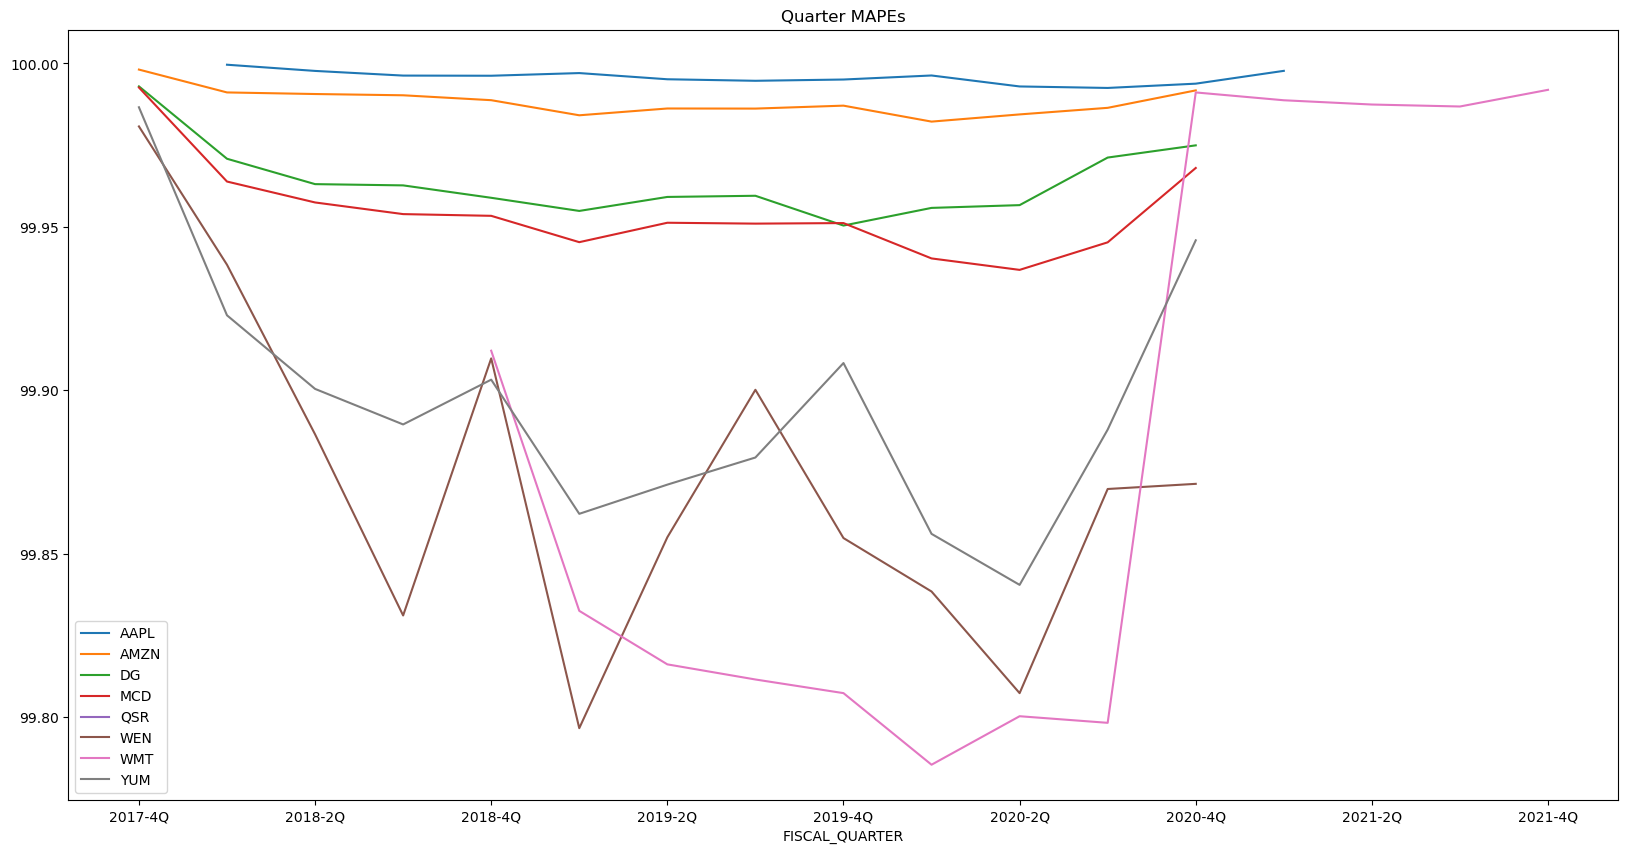

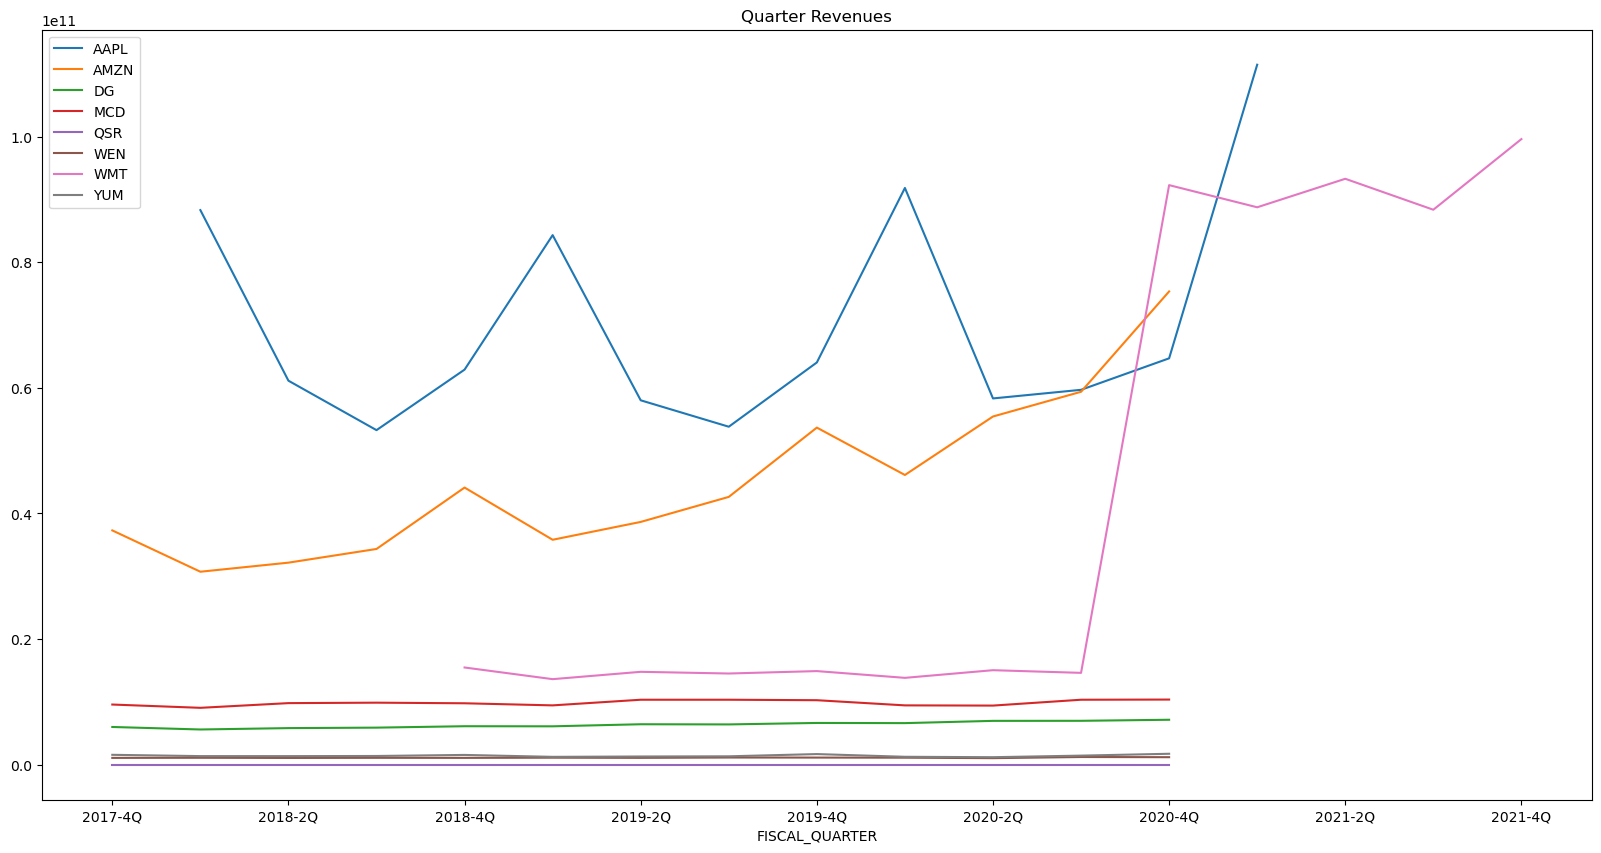

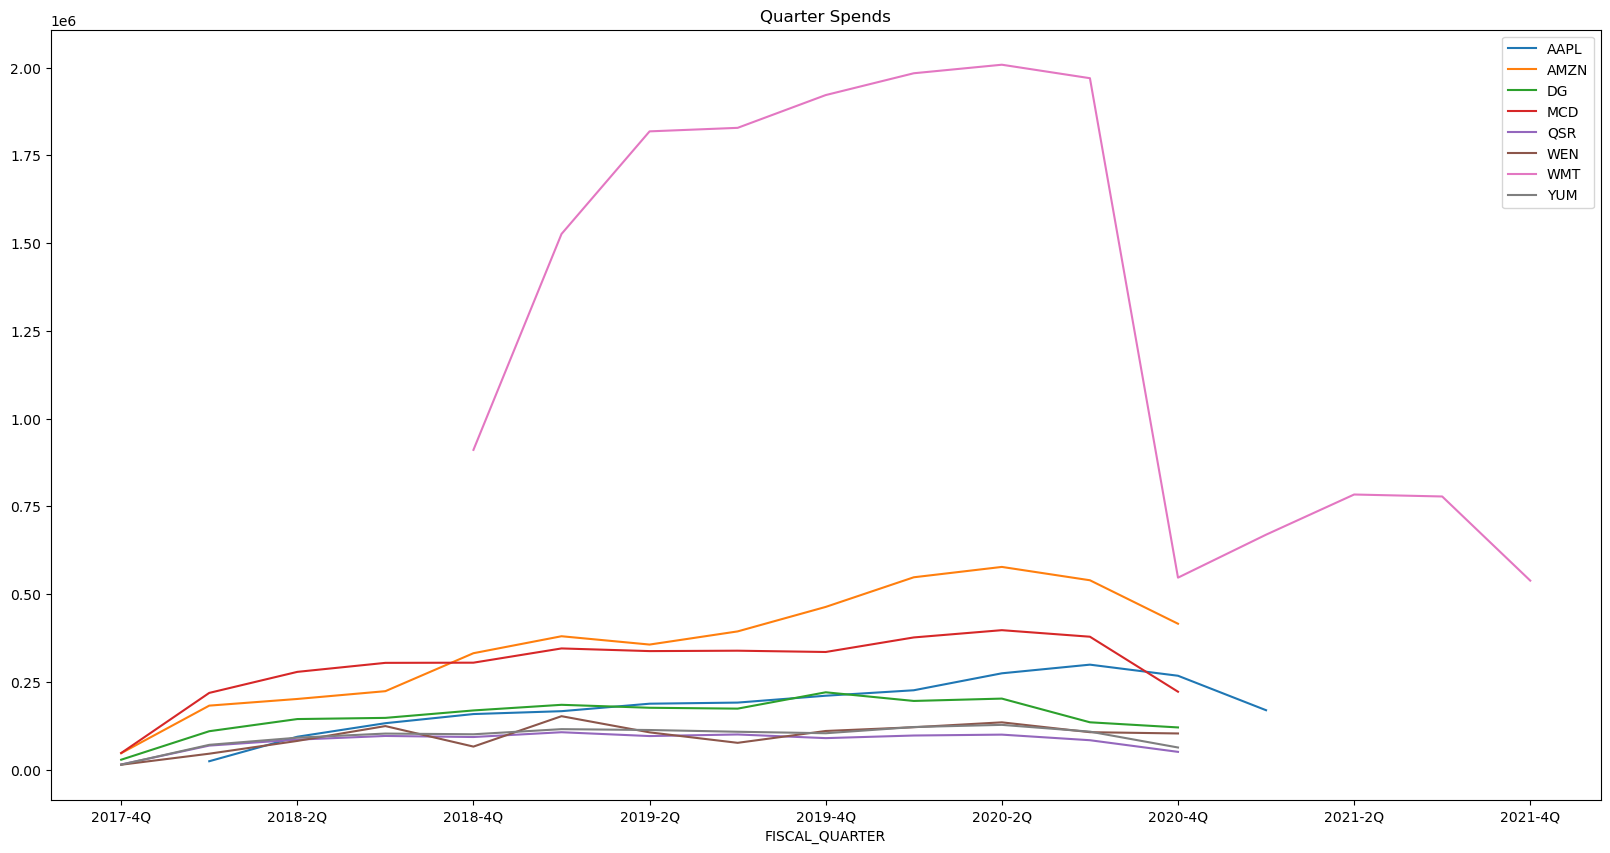

In [191]:
preds = X@result.x

# Plot per company MAPES, revenues, and spends across fiscal quarters
quarter_mapes = {}
quarter_revenues = {}
quarter_spends = {}
for company in y.index.get_level_values('MERCHANT_TICKER'):
    mapes = 100*((y.loc[company] - preds.loc[company]).abs()/y.loc[company]).groupby('FISCAL_QUARTER').mean()
    quarter_mapes[company] = mapes
    quarter_revenues[company] = y.loc[company].groupby('FISCAL_QUARTER').sum()
    quarter_spends[company] = X.loc[company].sum(axis=1)
pd.DataFrame(quarter_mapes).plot(figsize=(20,10), title='Quarter MAPEs')
pd.DataFrame(quarter_revenues).plot(figsize=(20,10), title='Quarter Revenues')
pd.DataFrame(quarter_spends).plot(figsize=(20,10), title='Quarter Spends')

In [192]:
print('Total MAPE:', ((y-preds).abs()/y).mean()*100)

Total MAPE: 99.93668743508559
